# Imports

In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import nltk
import re
import pandas as pd
import os
import gensim
from gensim.models import Word2Vec, FastText,KeyedVectors
from gensim.models.fasttext import save_facebook_model, load_facebook_model
from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec
from nltk.corpus import stopwords
import time
import numpy as np
from sklearn.manifold import TSNE
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings

from itertools import chain

warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords')
json_path = "/content/drive/MyDrive/json"

import argparse
import numpy as np
from sklearn.metrics import f1_score
from scipy.stats import pearsonr





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
gensim.__version__

'4.1.2'

# reading json and transform in pandas dataframe

In [ ]:
'''reading all the json from google drive, transforming each one into a dataframe,
 then concatenating them into one
'''
dfs = []
for file in os.listdir(json_path):
    if file.endswith("json"): 
        json = '/content/drive/MyDrive/json/' + file
        print(file)
        data = pd.read_json(json)
        dfs.append(data)
df = pd.concat(dfs, ignore_index=True)


Sorria_45_set_out_de_2015.json
Sorria_35_dez_de_2013_jan_de_2014.json
Sorria_36_fev_mar_de_2014.json
Sorria_29_dez_de_2012_jan_de_2013.json
Sorria_34_out_nov_de_2013.json
Sorria_33_ago_set_de_2013.json
Sorria_31_abr_mai_de_2013.json
Sorria_38_jun_jul_de_2014.json
Sorria_41_dez_2014_jan_2015.json
Sorria_16_out_nov_2010.json
Sorria_28_out_nov_de_2012.json
Sorria_30_fev_mar_de_2013.json
Sorria_19_abr_mai_de_2011.json
Sorria_06_jan_fev_de_2009.json
Sorria_32_jun_jul_de_2013.json
Sorria_05_nov_dez_de_2008.json
Sorria_13_abr_mai_de_2010.json
Sorria_10_out_nov_de_2009.json
Sorria_01_mar_abr_de_2008.json
Sorria_14_jun_jul_de_2010.json
Sorria_17_dez_de_2010_jan_de_2011.json
Sorria_09_ago_set_de_2009.json
Sorria_08_jun_jul_de_2009.json
Sorria_15_ago_set_de_2010.json
Sorria_25_abr_mai_de_2012.json
Sorria_23_dez_de_2011_jan_de_2012.json
Sorria_26_jun_jul_de_2012.json
Sorria_07_mar_abr_de_2009.json
Sorria_27_ago_set_de_2012.json
Sorria_21_ago_set_de_2011.json
Sorria_24_fev_mar_de_2012.json
Sorria_1

In [ ]:
# checking the first readings
df['section'] = df['section'].str.lower()
df.head()

,section,title,author,edition,months,year,text
0,carta da roberta,Todo mundo menos você,,45,set/out,2015,'MAS TODO MUNDO VAI' foi uma das frases que eu...
1,prazeres simples,Hora de morfar,ROBERTA FARIA,45,set/out,2015,"A té uns 4 anos de idade, minha irmã mais nova..."
2,valores essenciais,"Não tema a sua bolha,",,45,set/out,2015,"RENATA MAZZINI 38 anos, abandonou o mundo da m..."
3,dá pra mudar?,UM PASSEIO PELA SUA HISTÓRIA,HELENA FRUET,45,set/out,2015,NOSSA REPÓRTER REVISITOU SEU PASSADO PARA ENT...
4,manual prático,FAZER O BEM EM 6 PASSOS,PAULA SEMER,45,set/out,2015,Como eu posso CONVIVER MAIS COM A NATUREZA? SS...


In [ ]:
# checking the latest readings
df.tail()

,section,title,author,edition,months,year,text
680,prazeres simples,Para que ter irmãos,ARTUR LOUBACK,44,jul/ago,2015,Existem algumas experiências na vida definiti...
681,valores essenciais,O lado bom da Vida,RAFAELA CARVALHOlettering GUILHERME MENGA,44,jul/ago,2015,TUDO QUE VIVEMOS TEM UMA FACE POSITIVA E OUTR...
682,dá pra mudar?,PRAZER EM CONHECER,HELAINE MARTINS,44,jul/ago,2015,NOSSA REPÓRTER VENCEU O CONFORTO DO SEU CANTI...
683,manual prático,FAZER O BEM EM 6 PASSOS,JAQUELINE,44,jul/ago,2015,"Uma das técnicas para domar o nervosismo é, ..."
684,gente que faz,TERCEIRA IDADE RIMA COM FELICIDADE,LUCIANA ALVAREZ,44,jul/ago,2015,"SO UM PROBLEMA, MUITAS SOLUÇÕES PROPORCIONAR O..."


In [ ]:
titulos = df['section']
titulos = titulos.to_list()
print(sorted(set(titulos)))

['amar', 'aprender', 'ação e diversão', 'brincar', 'carta da roberta', 'carta do editor', 'comer', 'como eu faço?', 'como vai você?', 'conhecer', 'conviver', 'crescer', 'cuidar', 'descobrir', 'dia útil', 'dá pra mudar?', 'editorial', 'educar', 'envolver', 'gente que faz', 'lugar em comum', 'manual prático', 'movimentar', 'nota 10', 'prazeres simples', 'proteger', 'trabalhar', 'tá na mesa', 'valores essenciais', 'viajar']


In [ ]:
amar = df.loc[df['section'] == 'amar']
aprender = df.loc[df['section'] == 'aprender']
brincar = df.loc[df['section'] == 'brincar']
roberta = df.loc[df['section'] == 'carta da roberta']
editor = df.loc[df['section'] == 'carta do editor']
comer = df.loc[df['section'] == 'comer']
como_faço = df.loc[df['section'] == 'como eu faço?']
como_vai = df.loc[df['section'] == 'como vai você?']
conhecer = df.loc[df['section'] == 'conhecer']
conviver = df.loc[df['section'] == 'conviver']
crescer = df.loc[df['section'] == 'crescer']
cuidar = df.loc[df['section'] == 'cuidar']
descobrir = df.loc[df['section'] == 'descobrir']
dia_util = df.loc[df['section'] == 'dia útil']
editorial = df.loc[df['section'] == 'editorial']
educar = df.loc[df['section'] == 'educar']
envolver = df.loc[df['section'] == 'envolver']
gente_faz = df.loc[df['section'] == 'gente que faz']
lugar_comum = df.loc[df['section'] == 'lugar em comum']
manual = df.loc[df['section'] == 'manual prático']
movimentar = df.loc[df['section'] == 'movimentar']
nota = df.loc[df['section'] == 'nota 10']
prazeres = df.loc[df['section'] == 'prazeres simples']
proteger = df.loc[df['section'] == 'proteger']
trabalhar = df.loc[df['section'] == 'trabalhar']
mesa = df.loc[df['section'] == 'tá na mesa']
valores = df.loc[df['section'] == 'valores essenciais']
viajar = df.loc[df['section'] == 'viajar']
mudar = df.loc[df['section'] == 'dá pra mudar?']
acao = df.loc[df['section'] == 'ação e diversão']


In [ ]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   section  685 non-null    object
 1   title    685 non-null    object
 2   author   685 non-null    object
 3   edition  685 non-null    object
 4   months   685 non-null    object
 5   year     685 non-null    object
 6   text     685 non-null    object
dtypes: object(7)
memory usage: 37.6+ KB


In [ ]:
# checking if there are any empty lines, if so how many
df.isna().sum()

section    0
title      0
author     0
edition    0
months     0
year       0
text       0
dtype: int64

# PRE-PROCESSING

In [ ]:
# counting tokens and types
def token_count(df):
        initialtime = time.time()
        doc = ' '.join(df['section'].tolist())
        doc = ' '.join(df['title'].tolist())
        doc = ' '.join(df['text'].tolist())
        doc = nltk.word_tokenize(doc)


        print(f'Our corpus contains: {len(doc)} tokens ')
        print(f'Our corpus contains: {len(set(doc))} types')

        m,s = divmod(time.time() - initialtime, 60)
        print(f'Time spent: {m:.0f} minutes and {s:.0f} seconds')

In [ ]:
# removing stopwords, punctuation, leaving everything in lowercase, and tokenizing all the sentences and words
def preprocessing(df, process):
    initialtime = time.time()
    special = ['!', '.', ',', ';', ':', '?', '*', '&', '%', '{', '}', '[', ']',
                 '<', '>', '(', ')', '...', '$', '-', '"', "'", '–']
    doc = ' '.join(df[process].tolist())
    word = []
    doc = doc.lower()
    #doc = re.sub('\d+', ' ', doc)
    #doc = re.sub('\s+', ' ', doc)
    
    sentences = nltk.sent_tokenize(doc)
    doc = [nltk.word_tokenize(sentence) for sentence in sentences]
    for i in range(len(doc)):     
        doc[i] = [w for w in doc[i] if w  not  in special]
    for i in range(len(doc)):
        doc[i] = [w for w in doc[i] if w  not  in stopwords.words('portuguese')]

    m,s = divmod(time.time() - initialtime, 60)
    print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')
    return doc


In [ ]:
token_count(df)

Our corpus contains: 1256598 tokens 
Our corpus contains: 67090 types
Time spent: 0 minutes and 9 seconds


In [ ]:
token_count(amar)
token_count(aprender)
token_count(brincar)
token_count(roberta)
token_count(editor)
token_count(comer)
token_count(como_faço)
token_count(como_vai)
token_count(conhecer)
token_count(conviver)
token_count(crescer)
token_count(cuidar)
token_count(descobrir)
token_count(dia_util)
token_count(editorial)
token_count(educar)
token_count(envolver)
token_count(gente_faz)
token_count(lugar_comum)
token_count(manual)
token_count(movimentar)
token_count(nota)
token_count(prazeres)
token_count(proteger)
token_count(trabalhar)
token_count(mesa)
token_count(valores)
token_count(viajar)

Our corpus contains: 73334 tokens 
Our corpus contains: 11657 types
Time spent: 0 minutes and 1 seconds
Our corpus contains: 805 tokens 
Our corpus contains: 391 types
Time spent: 0 minutes and 0 seconds
Our corpus contains: 36200 tokens 
Our corpus contains: 8358 types
Time spent: 0 minutes and 0 seconds
Our corpus contains: 55950 tokens 
Our corpus contains: 9261 types
Time spent: 0 minutes and 0 seconds
Our corpus contains: 624 tokens 
Our corpus contains: 363 types
Time spent: 0 minutes and 0 seconds
Our corpus contains: 25632 tokens 
Our corpus contains: 4925 types
Time spent: 0 minutes and 0 seconds
Our corpus contains: 10499 tokens 
Our corpus contains: 3356 types
Time spent: 0 minutes and 0 seconds
Our corpus contains: 15789 tokens 
Our corpus contains: 3737 types
Time spent: 0 minutes and 0 seconds
Our corpus contains: 40772 tokens 
Our corpus contains: 7544 types
Time spent: 0 minutes and 0 seconds
Our corpus contains: 37678 tokens 
Our corpus contains: 7598 types
Time spent:

In [ ]:
token_count(mudar)
token_count(acao)

Our corpus contains: 101630 tokens 
Our corpus contains: 14066 types
Time spent: 0 minutes and 1 seconds
Our corpus contains: 15643 tokens 
Our corpus contains: 3729 types
Time spent: 0 minutes and 0 seconds


In [ ]:
print('before processing:')
print(df.text)

before processing:
0      'MAS TODO MUNDO VAI' foi uma das frases que eu...
1      A té uns 4 anos de idade, minha irmã mais nova...
2      RENATA MAZZINI 38 anos, abandonou o mundo da m...
3       NOSSA REPÓRTER REVISITOU SEU PASSADO PARA ENT...
4      Como eu posso CONVIVER MAIS COM A NATUREZA? SS...
                             ...                        
680     Existem algumas experiências na vida definiti...
681     TUDO QUE VIVEMOS TEM UMA FACE POSITIVA E OUTR...
682     NOSSA REPÓRTER VENCEU O CONFORTO DO SEU CANTI...
683      Uma das técnicas para domar o nervosismo é, ...
684    SO UM PROBLEMA, MUITAS SOLUÇÕES PROPORCIONAR O...
Name: text, Length: 685, dtype: object


In [ ]:
# Processing on texts only
doc = preprocessing(df, 'text')


Time spent:2 minutes and 39 seconds


In [ ]:
# text + titles
doc2 = preprocessing(df, 'title')
doc = [*doc, *doc2]
#print('post-processing: ')
#print(doc[0:100])


Time spent:0 minutes and 0 seconds


In [ ]:
flatten_doc =  list(chain.from_iterable(doc))
len(flatten_doc)

627961

In [ ]:
len(set(flatten_doc))

52148

# Word Embeddings

## Word2Vec Skip-Gram


### vector_size = 50

In [ ]:
initialtime = time.time()
w2v_skip = Word2Vec(doc,min_count=1, vector_size=50, sg=1 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:0 minutes and 21 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
w2v_skip.wv.most_similar("experiências")


[('questões', 0.939179003238678),
 ('possibilidades', 0.9376232624053955),
 ('conquistas', 0.9365730881690979),
 ('maneiras', 0.9359921216964722),
 ('descobertas', 0.9326089024543762),
 ('formas', 0.9312138557434082),
 ('atos', 0.9296935200691223),
 ('idéias', 0.9275146126747131),
 ('vidas', 0.9265495538711548),
 ('inspirar', 0.9264516830444336)]

In [ ]:
w2v_skip.wv.most_similar("amizade")


[('gratidão', 0.9562724828720093),
 ('existência', 0.9559687376022339),
 ('inspira', 0.9514749646186829),
 ('valorizar', 0.9499292969703674),
 ('significado', 0.949073851108551),
 ('otimismo', 0.9462213516235352),
 ('reconhecimento', 0.9455806016921997),
 ('maturidade', 0.9451740980148315),
 ('motivação', 0.9446029663085938),
 ('acredita', 0.9440907835960388)]

In [ ]:
w2v_skip.wv.most_similar("contar")


[('responder', 0.906391978263855),
 ('conto', 0.9053433537483215),
 ('chorar', 0.9023270606994629),
 ('gostar', 0.9016516804695129),
 ('conversar', 0.9008773565292358),
 ('nisso', 0.8988856673240662),
 ('descobrir', 0.8977490663528442),
 ('encontrar', 0.896223247051239),
 ('explicar', 0.895972728729248),
 ('tocar', 0.8941993713378906)]

In [ ]:
w2v_skip.wv.most_similar("comer")


[('cozinhar', 0.9342320561408997),
 ('ﬁcar', 0.9337461590766907),
 ('beber', 0.9216081500053406),
 ('descansar', 0.9193437099456787),
 ('pronto', 0.9089405536651611),
 ('cortar', 0.9084259271621704),
 ('gostoso', 0.9021704792976379),
 ('acordar', 0.9019717574119568),
 ('preparar', 0.8967113494873047),
 ('cabelo', 0.8953143358230591)]

In [ ]:
w2v_skip.wv.most_similar("geralmente")


[('únicos', 0.9754015207290649),
 ('correria', 0.9730977416038513),
 ('estranhos', 0.9728556871414185),
 ('fases', 0.9714670777320862),
 ('imaginando', 0.971277117729187),
 ('percurso', 0.970654308795929),
 ('sequer', 0.9705461859703064),
 ('datas', 0.9701988101005554),
 ('percebendo', 0.9699447154998779),
 ('trocando', 0.9693936109542847)]

In [ ]:
w2v_skip.wv.most_similar("aparentemente")


[('semelhantes', 0.9861837029457092),
 ('servem', 0.9856560826301575),
 ('altos', 0.9833083748817444),
 ('vocabulário', 0.9826009273529053),
 ('sons', 0.9815751910209656),
 ('negativos', 0.9801498055458069),
 ('traumas', 0.9798896312713623),
 ('frustrações', 0.9798182845115662),
 ('significativas', 0.9790799617767334),
 ('únicas', 0.9787204265594482)]

In [ ]:
w2v_skip.wv.most_similar("bom")


[('diﬁculdade', 0.8899530172348022),
 ('quê', 0.8646166920661926),
 ('nível', 0.8436123132705688),
 ('dificuldade', 0.8304868340492249),
 ('ruim', 0.8291352987289429),
 ('mau', 0.8284080028533936),
 ('acho', 0.8264800906181335),
 ('ah', 0.8236915469169617),
 ('lindo', 0.8142784237861633),
 ('impossível', 0.8124697208404541)]

In [ ]:
w2v_skip.wv.most_similar("ruim")


[('pressa', 0.9604620933532715),
 ('digo', 0.9599700570106506),
 ('percebe', 0.9597533345222473),
 ('impossível', 0.9597070813179016),
 ('duro', 0.9578285813331604),
 ('motivo', 0.9568678140640259),
 ('sabemos', 0.9565054774284363),
 ('devo', 0.9562487602233887),
 ('parecia', 0.9553170800209045),
 ('forte', 0.9536511301994324)]

In [ ]:
w2v_skip.wv.most_similar("mãozinha")


[('ﬁzer', 0.9912542104721069),
 ('mobilizar-se', 0.990596354007721),
 ('criticar', 0.9901872873306274),
 ('ignora', 0.9884740710258484),
 ('alcançá-la', 0.9883232116699219),
 ('prazer.', 0.9879674315452576),
 ('limite.', 0.9879472255706787),
 ('embora.', 0.9874908924102783),
 ('horror', 0.9873892068862915),
 ('reproduzindo', 0.987253725528717)]

In [ ]:
w2v_skip.wv.most_similar("minissaquinhos")


[('ferrenho', 0.9861412048339844),
 ('vocalista', 0.9848371744155884),
 ('inﬂuenciou', 0.9844404458999634),
 ('trave', 0.9838829636573792),
 ('chase', 0.9837886691093445),
 ('crônicos', 0.9835191369056702),
 ('comes', 0.9835000038146973),
 ('entregue', 0.9832371473312378),
 ('calouros', 0.9832048416137695),
 ('trapezista', 0.9830167889595032)]

### vector_size = 100

In [ ]:
initialtime = time.time()
w2v_skip = Word2Vec(doc,min_count=1, vector_size=100, sg=1 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:0 minutes and 18 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
w2v_skip.wv.most_similar("experiências")


[('maneiras', 0.9338929057121277),
 ('conquistas', 0.9338087439537048),
 ('possibilidades', 0.930572509765625),
 ('situações', 0.9293695688247681),
 ('ideias', 0.9292725324630737),
 ('descobertas', 0.9251813292503357),
 ('questões', 0.9223352074623108),
 ('gestos', 0.9158865213394165),
 ('culturas', 0.914570152759552),
 ('formas', 0.9140859246253967)]

In [ ]:
w2v_skip.wv.most_similar("amizade")


[('maturidade', 0.9609805345535278),
 ('gentileza', 0.958060085773468),
 ('otimismo', 0.9579784870147705),
 ('gratidão', 0.9570661187171936),
 ('motivação', 0.952957034111023),
 ('pensamos', 0.9518173336982727),
 ('transformadora', 0.9507748484611511),
 ('demonstrar', 0.9503832459449768),
 ('confiança', 0.9493897557258606),
 ('existência', 0.9481866955757141)]

In [ ]:
w2v_skip.wv.most_similar("contar")


[('encontramos', 0.9057786464691162),
 ('encontrar', 0.8937186598777771),
 ('contando', 0.8890507221221924),
 ('compartilhar', 0.8871862888336182),
 ('gostar', 0.886519730091095),
 ('tocar', 0.8856006264686584),
 ('conversar', 0.8844849467277527),
 ('conto', 0.88179612159729),
 ('inspirem', 0.8814860582351685),
 ('amar', 0.881010890007019)]

In [ ]:
w2v_skip.wv.most_similar("comer")


[('cozinhar', 0.9356414079666138),
 ('ﬁcar', 0.9255455732345581),
 ('descansar', 0.916899561882019),
 ('cortar', 0.9162670373916626),
 ('pronto', 0.9134200811386108),
 ('acordar', 0.9000581502914429),
 ('comendo', 0.8986754417419434),
 ('dormir', 0.8979491591453552),
 ('beber', 0.8961401581764221),
 ('lavar', 0.8958497047424316)]

In [ ]:
w2v_skip.wv.most_similar("geralmente")


[('percurso', 0.9759566187858582),
 ('longas', 0.9729506373405457),
 ('observando', 0.9708076119422913),
 ('dividindo', 0.9705249071121216),
 ('percebendo', 0.9702165722846985),
 ('precisavam', 0.970202624797821),
 ('vimos', 0.9701942205429077),
 ('únicos', 0.969624400138855),
 ('trocando', 0.9688423871994019),
 ('nascem', 0.9688379764556885)]

In [ ]:
w2v_skip.wv.most_similar("aparentemente")


[('idéias', 0.9821748733520508),
 ('altos', 0.9819399118423462),
 ('sons', 0.978924572467804),
 ('servem', 0.9764978885650635),
 ('jeitos', 0.9764865040779114),
 ('vantagens', 0.9759581089019775),
 ('sensações', 0.9753604531288147),
 ('tristes', 0.9747320413589478),
 ('aprendizados', 0.9745498299598694),
 ('surgem', 0.9745211601257324)]

In [ ]:
w2v_skip.wv.most_similar("bom")


[('diﬁculdade', 0.8582860827445984),
 ('nível', 0.8444877862930298),
 ('quê', 0.8426858186721802),
 ('ruim', 0.8373458981513977),
 ('dificuldade', 0.8321177363395691),
 ('lindo', 0.824773907661438),
 ('humor', 0.8211075663566589),
 ('mau', 0.8164637684822083),
 ('divertido', 0.8147943019866943),
 ('fácil', 0.8108838200569153)]

In [ ]:
w2v_skip.wv.most_similar("ruim")


[('impossível', 0.9673326015472412),
 ('querer', 0.966989278793335),
 ('ótimo', 0.9659683704376221),
 ('brigar', 0.9657633304595947),
 ('ah', 0.9652033448219299),
 ('percebe', 0.9652028679847717),
 ('esquecer', 0.9650381207466125),
 ('alívio', 0.9642037153244019),
 ('imaginar', 0.9632827043533325),
 ('imagina', 0.9630244970321655)]

In [ ]:
w2v_skip.wv.most_similar("mãozinha")


[('torná-lo', 0.9930891394615173),
 ('juízo', 0.9918516874313354),
 ('usá-la', 0.9918032884597778),
 ('justifica', 0.9915063977241516),
 ('amadurecendo', 0.9914554357528687),
 ('aprendida', 0.9913776516914368),
 ('todo.', 0.9912748336791992),
 ('idade.', 0.9912725687026978),
 ('-—', 0.9911526441574097),
 ('coração.', 0.9909152984619141)]

In [ ]:
w2v_skip.wv.most_similar("minissaquinhos")


[('monumento', 0.9861627817153931),
 ('astecas', 0.9854325652122498),
 ('ranger', 0.9849210381507874),
 ('bojunga', 0.9848798513412476),
 ('atacama', 0.9845814108848572),
 ('los', 0.9845514893531799),
 ('cultivadas', 0.9843801259994507),
 ('isolada', 0.984372079372406),
 ('soviético', 0.9842931032180786),
 ('trocada', 0.9841627478599548)]

In [ ]:
w2v_skip.wv.save_word2vec_format('/content/drive/MyDrive/wordembeddings/w2vskip100.txt', binary=False)

### vector_size = 300

In [ ]:
initialtime = time.time()
w2v_skip = Word2Vec(doc,min_count=1, vector_size=300, sg=1 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:0 minutes and 37 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
w2v_skip.wv.most_similar("experiências")


[('possibilidades', 0.9473098516464233),
 ('conquistas', 0.9454604387283325),
 ('inspirar', 0.9432600140571594),
 ('vidas', 0.9411314129829407),
 ('gestos', 0.9407312870025635),
 ('escolhas', 0.9358173608779907),
 ('compartilhar', 0.9354471564292908),
 ('questões', 0.9346259236335754),
 ('situações', 0.9345733523368835),
 ('aprendizados', 0.9341254830360413)]

In [ ]:
w2v_skip.wv.most_similar("amizade")


[('otimismo', 0.9650845527648926),
 ('gratidão', 0.9596697092056274),
 ('maturidade', 0.9593086838722229),
 ('motivação', 0.9585379362106323),
 ('existência', 0.9584211707115173),
 ('acredita', 0.9548844695091248),
 ('solidariedade', 0.954584538936615),
 ('favor', 0.9537941813468933),
 ('tolerância', 0.9534099698066711),
 ('ama', 0.9527809023857117)]

In [ ]:
w2v_skip.wv.most_similar("contar")


[('encontrar', 0.9130311012268066),
 ('conhecer', 0.9111742973327637),
 ('encontramos', 0.9106116890907288),
 ('nessa', 0.9033742547035217),
 ('descobrir', 0.9030864834785461),
 ('seguir', 0.9024580717086792),
 ('inspirem', 0.8964217901229858),
 ('conversar', 0.895460844039917),
 ('responder', 0.8914706707000732),
 ('contando', 0.891167163848877)]

In [ ]:
w2v_skip.wv.most_similar("comer")


[('ﬁcar', 0.9495287537574768),
 ('cozinhar', 0.9361922740936279),
 ('pronto', 0.93010413646698),
 ('descansar', 0.9278303384780884),
 ('cortar', 0.9206660985946655),
 ('acordar', 0.9163207411766052),
 ('comendo', 0.9123372435569763),
 ('dormir', 0.9113351106643677),
 ('ligar', 0.9109360575675964),
 ('pronta', 0.9108208417892456)]

In [ ]:
w2v_skip.wv.most_similar("geralmente")


[('únicos', 0.9802390336990356),
 ('longas', 0.9786204695701599),
 ('abrem', 0.9785708785057068),
 ('surgem', 0.9782887101173401),
 ('faltam', 0.9760115146636963),
 ('anteriores', 0.9749496579170227),
 ('dividindo', 0.9745023846626282),
 ('banais', 0.9740118980407715),
 ('igualmente', 0.9728046655654907),
 ('percurso', 0.9727289080619812)]

In [ ]:
w2v_skip.wv.most_similar("aparentemente")


[('sons', 0.9888994693756104),
 ('semelhantes', 0.9870641827583313),
 ('altos', 0.9870046377182007),
 ('únicas', 0.9862750172615051),
 ('qualidades', 0.9857081174850464),
 ('traumas', 0.985374391078949),
 ('vozes', 0.9848731756210327),
 ('propomos', 0.9838449954986572),
 ('significativas', 0.9837557077407837),
 ('alheias', 0.983260452747345)]

In [ ]:
w2v_skip.wv.most_similar("bom")


[('diﬁculdade', 0.8711420297622681),
 ('quê', 0.8638327121734619),
 ('mau', 0.8430144190788269),
 ('ruim', 0.8406857848167419),
 ('humor', 0.8342673778533936),
 ('acho', 0.8339625597000122),
 ('lindo', 0.8330409526824951),
 ('ah', 0.832342267036438),
 ('dificuldade', 0.8318679928779602),
 ('querer', 0.8283953666687012)]

In [ ]:
w2v_skip.wv.most_similar("ruim")


[('querer', 0.9733870625495911),
 ('impulso', 0.9708389639854431),
 ('confortável', 0.9706656336784363),
 ('alívio', 0.9677938222885132),
 ('ótimo', 0.9673100709915161),
 ('pareça', 0.9664039015769958),
 ('desistir', 0.9656180739402771),
 ('duro', 0.9655991792678833),
 ('digo', 0.9650874733924866),
 ('risada', 0.9650617241859436)]

In [ ]:
w2v_skip.wv.most_similar("mãozinha")


[('duvida', 0.9942821860313416),
 ('baita', 0.992982804775238),
 ('param', 0.9928795695304871),
 ('impedimento', 0.9927694797515869),
 ('ufa', 0.9926655888557434),
 ('pescar', 0.992570161819458),
 ('inércia', 0.9925543069839478),
 ('script', 0.9924170970916748),
 ('ordens', 0.9923699498176575),
 ('sogra', 0.9923362731933594)]

In [ ]:
w2v_skip.wv.most_similar("minissaquinhos")


[('1.5721.0015', 0.992881715297699),
 ('indicador', 0.9927330613136292),
 ('pupi', 0.9926695823669434),
 ('eric', 0.9925651550292969),
 ('infecção', 0.9924711585044861),
 ('kieran', 0.9924231767654419),
 ('golden', 0.992409884929657),
 ('mpb', 0.9923189878463745),
 ('not', 0.9922451972961426),
 ('assou', 0.9922375082969666)]

In [ ]:
w2v_skip.wv.save_word2vec_format('/content/drive/MyDrive/wordembeddings/w2vskip300.txt', binary=False)

### vector_size = 600

In [ ]:
initialtime = time.time()
w2v_skip = Word2Vec(doc,min_count=1, vector_size=600, sg=1 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:1 minutes and 4 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
w2v_skip.wv.most_similar("experiências")


[('conquistas', 0.9639219045639038),
 ('maneiras', 0.9554003477096558),
 ('possibilidades', 0.952642560005188),
 ('questões', 0.9496383666992188),
 ('novas', 0.947932243347168),
 ('ideias', 0.947102427482605),
 ('fundamentais', 0.946923017501831),
 ('gestos', 0.9460968971252441),
 ('reflexões', 0.9444723129272461),
 ('formas', 0.943279504776001)]

In [ ]:
w2v_skip.wv.most_similar("amizade")


[('otimismo', 0.968307614326477),
 ('motivação', 0.9656665921211243),
 ('maturidade', 0.9640147089958191),
 ('existência', 0.9635882377624512),
 ('tolerância', 0.9627504348754883),
 ('gratidão', 0.9624422788619995),
 ('significado', 0.9591792225837708),
 ('gesto', 0.9591377377510071),
 ('solidariedade', 0.9589270353317261),
 ('inspira', 0.9581646919250488)]

In [ ]:
w2v_skip.wv.most_similar("contar")


[('encontramos', 0.926663339138031),
 ('conversar', 0.9239718317985535),
 ('seguir', 0.9167904257774353),
 ('conto', 0.9134892821311951),
 ('contando', 0.9111584424972534),
 ('dividir', 0.908255398273468),
 ('lições', 0.9075548648834229),
 ('chorar', 0.9068592190742493),
 ('encontrar', 0.9064084887504578),
 ('conhecer', 0.9063419699668884)]

In [ ]:
w2v_skip.wv.most_similar("comer")


[('cozinhar', 0.9469519853591919),
 ('descansar', 0.9401001334190369),
 ('ﬁcar', 0.9386427998542786),
 ('cortar', 0.923520565032959),
 ('pronto', 0.9214367270469666),
 ('acordar', 0.9181547164916992),
 ('comendo', 0.9142878651618958),
 ('roupa', 0.9141248464584351),
 ('dormir', 0.9134764671325684),
 ('come', 0.9118069410324097)]

In [ ]:
w2v_skip.wv.most_similar("geralmente")


[('únicos', 0.9792199730873108),
 ('nascem', 0.9782179594039917),
 ('percurso', 0.9771970510482788),
 ('longas', 0.9766806364059448),
 ('igualmente', 0.9760008454322815),
 ('despesas', 0.9751338958740234),
 ('afastar', 0.9750972390174866),
 ('trajeto', 0.9745422005653381),
 ('carregando', 0.9740789532661438),
 ('trocando', 0.973921000957489)]

In [ ]:
w2v_skip.wv.most_similar("aparentemente")


[('semelhantes', 0.9906418323516846),
 ('sons', 0.9882088899612427),
 ('servem', 0.9865550994873047),
 ('altos', 0.9864435195922852),
 ('baixos', 0.9863616228103638),
 ('negativos', 0.9859489798545837),
 ('fatos', 0.9855857491493225),
 ('estímulos', 0.9852370619773865),
 ('valem', 0.9850903153419495),
 ('possíveis', 0.984279215335846)]

In [ ]:
w2v_skip.wv.most_similar("bom")


[('diﬁculdade', 0.8775351643562317),
 ('quê', 0.8661583065986633),
 ('nível', 0.8531395196914673),
 ('mau', 0.84369957447052),
 ('deixa', 0.8429468274116516),
 ('divertido', 0.8372352719306946),
 ('ruim', 0.8345127701759338),
 ('impossível', 0.8340151309967041),
 ('querer', 0.8325416445732117),
 ('acho', 0.831506609916687)]

In [ ]:
w2v_skip.wv.most_similar("ruim")


[('digo', 0.977131724357605),
 ('alívio', 0.9755091071128845),
 ('confortável', 0.9705715179443359),
 ('imaginar', 0.9690999388694763),
 ('ótimo', 0.9686099886894226),
 ('ganho', 0.9684116840362549),
 ('repetir', 0.9672911763191223),
 ('contexto', 0.9670009613037109),
 ('contrário', 0.9666460156440735),
 ('errado', 0.9666083455085754)]

In [ ]:
w2v_skip.wv.most_similar("mãozinha")


[('recorda', 0.9955277442932129),
 ('usá-la', 0.9944955110549927),
 ('movimentação', 0.9939430356025696),
 ('reconheço', 0.9936613440513611),
 ('esperto', 0.9933958649635315),
 ('citação', 0.9933542609214783),
 ('remanejar', 0.9933304190635681),
 ('param', 0.9932851791381836),
 ('recomendou', 0.993284285068512),
 ('duvida', 0.993270754814148)]

In [ ]:
w2v_skip.wv.most_similar("minissaquinhos")


[('atlético', 0.9961009621620178),
 ('bandos', 0.9960666298866272),
 ('prótese', 0.9960024356842041),
 ('soltos', 0.9958792328834534),
 ('implicâncias', 0.9958333373069763),
 ('acrobacias', 0.9958299398422241),
 ('trajes', 0.995734453201294),
 ('resolvo', 0.9957286715507507),
 ('carimbos', 0.9957272410392761),
 ('diretas', 0.9956929683685303)]

In [ ]:
w2v_skip.wv.save_word2vec_format('/content/drive/MyDrive/wordembeddings/w2vskip600.txt', binary=False)

### vector_size = 1000

In [ ]:
initialtime = time.time()
w2v_skip = Word2Vec(doc,min_count=1, vector_size=1000, sg=1 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:1 minutes and 23 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
w2v_skip.wv.most_similar("experiências")


[('novas', 0.9615223407745361),
 ('maneiras', 0.9527562260627747),
 ('importantes', 0.9518289566040039),
 ('vidas', 0.9517789483070374),
 ('conquistas', 0.9486067891120911),
 ('diferenças', 0.9480998516082764),
 ('situações', 0.9478992819786072),
 ('questões', 0.9471855163574219),
 ('ideias', 0.9463409185409546),
 ('inspirar', 0.9457806348800659)]

In [ ]:
w2v_skip.wv.most_similar("amizade")


[('maturidade', 0.9702490568161011),
 ('gentileza', 0.9684693813323975),
 ('acredita', 0.9683039784431458),
 ('existência', 0.968214750289917),
 ('otimismo', 0.9678961038589478),
 ('gratidão', 0.9676300287246704),
 ('realização', 0.9667884111404419),
 ('luto', 0.9664244055747986),
 ('tolerância', 0.9657421708106995),
 ('acredito', 0.9651079773902893)]

In [ ]:
w2v_skip.wv.most_similar("contar")


[('conhecer', 0.9384043216705322),
 ('descobrir', 0.9295714497566223),
 ('encontrar', 0.9215236306190491),
 ('gostar', 0.9212088584899902),
 ('encontramos', 0.9193586111068726),
 ('nessa', 0.9176061153411865),
 ('seguir', 0.915755033493042),
 ('conversar', 0.914631187915802),
 ('adiante', 0.9144635200500488),
 ('dúvida', 0.912703275680542)]

In [ ]:
w2v_skip.wv.most_similar("comer")


[('ﬁcar', 0.9593399167060852),
 ('cozinhar', 0.9577488303184509),
 ('descansar', 0.949668824672699),
 ('pronto', 0.9476970434188843),
 ('cortar', 0.9419350028038025),
 ('frio', 0.9387210011482239),
 ('comendo', 0.9324267506599426),
 ('acordar', 0.9315372109413147),
 ('pronta', 0.9303174018859863),
 ('cozinha', 0.9288018941879272)]

In [ ]:
w2v_skip.wv.most_similar("geralmente")


[('acabam', 0.9836298227310181),
 ('sequer', 0.9804846048355103),
 ('checar', 0.9781966209411621),
 ('brincadeiras', 0.9765601754188538),
 ('cotidianas', 0.9761021137237549),
 ('dividindo', 0.9759513139724731),
 ('brigas', 0.9757949113845825),
 ('afastar', 0.975793719291687),
 ('marcar', 0.9755871891975403),
 ('surgem', 0.9754036664962769)]

In [ ]:
w2v_skip.wv.most_similar("aparentemente")


[('sons', 0.9895625710487366),
 ('servem', 0.9893750548362732),
 ('semelhantes', 0.9888148903846741),
 ('únicas', 0.9855232834815979),
 ('alheias', 0.9853354096412659),
 ('idéias', 0.9851641654968262),
 ('qualidades', 0.9850282073020935),
 ('altos', 0.984728217124939),
 ('vocabulário', 0.9844152927398682),
 ('estímulos', 0.9834752082824707)]

In [ ]:
w2v_skip.wv.most_similar("bom")


[('quê', 0.8853515386581421),
 ('diﬁculdade', 0.8829556107521057),
 ('ruim', 0.8756834268569946),
 ('deixa', 0.8676652312278748),
 ('acho', 0.8658167719841003),
 ('impossível', 0.8621537685394287),
 ('mau', 0.8614068031311035),
 ('fácil', 0.8613595366477966),
 ('lindo', 0.8573542833328247),
 ('ah', 0.8558744788169861)]

In [ ]:
w2v_skip.wv.most_similar("ruim")


[('percebe', 0.9796882271766663),
 ('querer', 0.9778721928596497),
 ('impossível', 0.9773588180541992),
 ('esquecer', 0.9754083752632141),
 ('sabemos', 0.9746420979499817),
 ('parecia', 0.9737637042999268),
 ('desistir', 0.973688542842865),
 ('esforçar', 0.9736639261245728),
 ('ótimo', 0.9736328125),
 ('brigar', 0.9735133051872253)]

In [ ]:
w2v_skip.wv.most_similar("mãozinha")


[('ops', 0.9976383447647095),
 ('recomendou', 0.9964526891708374),
 ('usá-la', 0.996275007724762),
 ('lapidar', 0.9962696433067322),
 ('foge', 0.9961155652999878),
 ('confunde', 0.9961013793945312),
 ('precisa.', 0.9960161447525024),
 ('criarmos', 0.9958131313323975),
 ('imitá-lo', 0.9958129525184631),
 ('simbólica', 0.995794951915741)]

In [ ]:
w2v_skip.wv.most_similar("minissaquinhos")


[('velocidades', 0.9972310066223145),
 ('estabilizantes', 0.997153103351593),
 ('pirâmide', 0.9970543384552002),
 ('visitávamos', 0.9969566464424133),
 ('desonestidade', 0.9969126582145691),
 ('esqueceram', 0.9968028664588928),
 ('diferentão', 0.9967496395111084),
 ('divulguem', 0.9967387318611145),
 ('ignorasse', 0.996734619140625),
 ('utilizou-se', 0.9967116117477417)]

In [ ]:
w2v_skip.wv.save_word2vec_format('/content/drive/MyDrive/wordembeddings/w2vskip1000.txt', binary=False)

## Word2Vec BOW

### vector_size = 50

In [ ]:
initialtime = time.time()
w2v_bow = Word2Vec(doc,min_count=1, vector_size=50, sg=0 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:0 minutes and 12 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
w2v_bow.wv.most_similar("experiências")


[('querem', 0.9935214519500732),
 ('inspirar', 0.9934453368186951),
 ('foco', 0.9931782484054565),
 ('amamos', 0.9929735660552979),
 ('traz', 0.9928892850875854),
 ('fato', 0.9928010106086731),
 ('novas', 0.9922714233398438),
 ('quais', 0.9922171235084534),
 ('dificuldade', 0.9915868043899536),
 ('ideias', 0.9913964867591858)]

In [ ]:
w2v_bow.wv.most_similar("amizade")


[('realização', 0.9970884919166565),
 ('existência', 0.9967790842056274),
 ('funciona', 0.9956271052360535),
 ('vencer', 0.9951613545417786),
 ('amar', 0.9948803186416626),
 ('gratidão', 0.9946831464767456),
 ('música', 0.9946692585945129),
 ('contrário', 0.9944876432418823),
 ('entendeu', 0.9943773150444031),
 ('voto', 0.9942693710327148)]

In [ ]:
w2v_bow.wv.most_similar("contar")


[('seguir', 0.988944947719574),
 ('esforço', 0.9880883693695068),
 ('encontrar', 0.9880220293998718),
 ('encarar', 0.9876363277435303),
 ('aceitar', 0.9873907566070557),
 ('dinheiro', 0.9871957302093506),
 ('perceber', 0.9870303273200989),
 ('compartilhar', 0.9861873984336853),
 ('afinal', 0.985706627368927),
 ('prática', 0.9856725335121155)]

In [ ]:
w2v_bow.wv.most_similar("comer")


[('ﬁcar', 0.9821133017539978),
 ('pouco', 0.9789819121360779),
 ('gostoso', 0.9764509201049805),
 ('óbvio', 0.9754922389984131),
 ('colocar', 0.9751126766204834),
 ('fofoca', 0.9748471975326538),
 ('cozinhar', 0.9744160771369934),
 ('deixar', 0.9737640619277954),
 ('guarda-chuva', 0.973730206489563),
 ('hora', 0.9723178744316101)]

In [ ]:
w2v_bow.wv.most_similar("geralmente")


[('surge', 0.9982739686965942),
 ('violência', 0.9976176023483276),
 ('reuniões', 0.9974368214607239),
 ('conforme', 0.9972990155220032),
 ('cheios', 0.9972605109214783),
 ('tornam', 0.9971515536308289),
 ('crises', 0.9970589876174927),
 ('checar', 0.9970016479492188),
 ('esportes', 0.996941864490509),
 ('treino', 0.9968862533569336)]

In [ ]:
w2v_bow.wv.most_similar("aparentemente")


[('objetos', 0.9967915415763855),
 ('espécies', 0.9966264367103577),
 ('técnicas', 0.996513843536377),
 ('reciclagem', 0.9962024688720703),
 ('feitos', 0.9960373044013977),
 ('marcas', 0.9960163235664368),
 ('doenças', 0.9957987666130066),
 ('movimentos', 0.9956454634666443),
 ('processos', 0.9955918192863464),
 ('possuem', 0.9955769777297974)]

In [ ]:
w2v_bow.wv.most_similar("bom")


[('dá', 0.984282910823822),
 ('parece', 0.9838730692863464),
 ('posso', 0.9834223985671997),
 ('fácil', 0.9820078611373901),
 ('nada', 0.9805499315261841),
 ('alguém', 0.9801909923553467),
 ('vontade', 0.9800119996070862),
 ('difícil', 0.9797449707984924),
 ('vou', 0.9782211780548096),
 ('algo', 0.978024423122406)]

In [ ]:
w2v_bow.wv.most_similar("ruim")


[('precisamos', 0.9940362572669983),
 ('desistir', 0.9936991930007935),
 ('significa', 0.9936268925666809),
 ('fica', 0.9935778975486755),
 ('claro', 0.9934278726577759),
 ('acho', 0.9933865666389465),
 ('caminho', 0.9931631088256836),
 ('verdade', 0.992828905582428),
 ('talvez', 0.9927237033843994),
 ('conseguir', 0.9924300312995911)]

In [ ]:
w2v_bow.wv.most_similar("mãozinha")


[('cheguem', 0.962326169013977),
 ('saberes', 0.9622611403465271),
 ('revela', 0.9618052244186401),
 ('beatles', 0.9615620374679565),
 ('moleque', 0.9611779451370239),
 ('colorida', 0.9611247777938843),
 ('termômetro', 0.9608659148216248),
 ('mágica', 0.9608303308486938),
 ('utilize', 0.9608173966407776),
 ('saltando', 0.9606107473373413)]

In [ ]:
w2v_bow.wv.most_similar("minissaquinhos")


[('vitamínico', 0.9286680221557617),
 ('lançada', 0.9273133277893066),
 ('patriota', 0.9260827302932739),
 ('tricampeã', 0.9258078336715698),
 ('econômico', 0.9257296919822693),
 ('atravessa', 0.9243321418762207),
 ('pop', 0.9238070249557495),
 ('diamantina', 0.9236494898796082),
 ('realizada', 0.9227553009986877),
 ('estagiário', 0.9225749969482422)]

In [ ]:
w2v_bow.wv.save_word2vec_format('/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vbow50.txt', binary=False)

### vector_size = 100

In [ ]:
initialtime = time.time()
w2v_BOW = Word2Vec(doc,min_count=1, vector_size=100, sg=0 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:0 minutes and 11 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
w2v_BOW.wv.most_similar("experiências")


[('aprende', 0.9962721467018127),
 ('ideias', 0.9955716729164124),
 ('amamos', 0.9951016902923584),
 ('seguir', 0.9948328733444214),
 ('fé', 0.9945657253265381),
 ('depende', 0.9944319725036621),
 ('traz', 0.9941774606704712),
 ('experimentar', 0.9941329956054688),
 ('novas', 0.9940653443336487),
 ('sinta', 0.9940025210380554)]

In [ ]:
w2v_BOW.wv.most_similar("amizade")


[('existência', 0.998192548751831),
 ('aprimorar', 0.9973729252815247),
 ('desejo', 0.9971927404403687),
 ('gratidão', 0.9971758723258972),
 ('contrário', 0.997113049030304),
 ('educar', 0.997069239616394),
 ('diferenças', 0.9968857169151306),
 ('funciona', 0.9967336058616638),
 ('resposta', 0.9965423941612244),
 ('investir', 0.9965222477912903)]

In [ ]:
w2v_BOW.wv.most_similar("contar")


[('compartilhar', 0.9897730350494385),
 ('confiar', 0.987865686416626),
 ('acreditar', 0.9876081943511963),
 ('resolver', 0.987286388874054),
 ('encontrar', 0.9864088892936707),
 ('continuar', 0.9863784313201904),
 ('perceber', 0.9863081574440002),
 ('afinal', 0.9861885905265808),
 ('aceitar', 0.9857809543609619),
 ('ensinar', 0.9856113791465759)]

In [ ]:
w2v_BOW.wv.most_similar("comer")


[('cozinhar', 0.98908931016922),
 ('ﬁcar', 0.9863442182540894),
 ('dedique', 0.9854749441146851),
 ('tomar', 0.9845184087753296),
 ('gostoso', 0.9840642213821411),
 ('desperdiçar', 0.9836923480033875),
 ('colocar', 0.9816189408302307),
 ('gastar', 0.9810237288475037),
 ('triviais', 0.9809811115264893),
 ('dormir', 0.9797800183296204)]

In [ ]:
w2v_BOW.wv.most_similar("geralmente")


[('personagens', 0.9982631802558899),
 ('cordas', 0.9980906844139099),
 ('coletivos', 0.9980842471122742),
 ('posições', 0.9980549216270447),
 ('tornam', 0.9980095624923706),
 ('antigos', 0.9979352355003357),
 ('conforme', 0.9978865385055542),
 ('cheios', 0.9978720545768738),
 ('cachorros', 0.9978643655776978),
 ('reuniões', 0.9978421330451965)]

In [ ]:
w2v_BOW.wv.most_similar("aparentemente")


[('serem', 0.9975981116294861),
 ('características', 0.9974807500839233),
 ('desenhos', 0.9974020719528198),
 ('aumento', 0.9973140954971313),
 ('geral', 0.9972854852676392),
 ('funcionam', 0.9972854256629944),
 ('práticas', 0.9970942139625549),
 ('diversas', 0.9968545436859131),
 ('frequência', 0.9968246817588806),
 ('termos', 0.9966649413108826)]

In [ ]:
w2v_BOW.wv.most_similar("bom")


[('posso', 0.9896302819252014),
 ('fácil', 0.9894375801086426),
 ('vontade', 0.9888826012611389),
 ('diferente', 0.9887825846672058),
 ('parece', 0.9883789420127869),
 ('difícil', 0.9877030849456787),
 ('jeito', 0.9864592552185059),
 ('alguém', 0.9846160411834717),
 ('ruim', 0.9841262698173523),
 ('querer', 0.9840152263641357)]

In [ ]:
w2v_BOW.wv.most_similar("ruim")


[('importa', 0.9938646554946899),
 ('acho', 0.993635356426239),
 ('sabe', 0.9929349422454834),
 ('precisamos', 0.9927874803543091),
 ('certeza', 0.992608368396759),
 ('acontecido', 0.9924481511116028),
 ('problema', 0.9923548102378845),
 ('difícil', 0.9923228025436401),
 ('achava', 0.9921379089355469),
 ('falta', 0.9920498132705688)]

In [ ]:
w2v_bow.wv.most_similar("mãozinha")


[('cheguem', 0.962326169013977),
 ('saberes', 0.9622611403465271),
 ('revela', 0.9618052244186401),
 ('beatles', 0.9615620374679565),
 ('moleque', 0.9611779451370239),
 ('colorida', 0.9611247777938843),
 ('termômetro', 0.9608659148216248),
 ('mágica', 0.9608303308486938),
 ('utilize', 0.9608173966407776),
 ('saltando', 0.9606107473373413)]

In [ ]:
w2v_bow.wv.most_similar("minissaquinhos")


[('vitamínico', 0.9286680221557617),
 ('lançada', 0.9273133277893066),
 ('patriota', 0.9260827302932739),
 ('tricampeã', 0.9258078336715698),
 ('econômico', 0.9257296919822693),
 ('atravessa', 0.9243321418762207),
 ('pop', 0.9238070249557495),
 ('diamantina', 0.9236494898796082),
 ('realizada', 0.9227553009986877),
 ('estagiário', 0.9225749969482422)]

In [ ]:
w2v_BOW.wv.save_word2vec_format('/content/drive/MyDrive/wordembeddings/w2vbow100.txt', binary=False)

### vector_size = 300

In [ ]:
initialtime = time.time()
w2v_BOW = Word2Vec(doc,min_count=1, vector_size=300, sg=0 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:0 minutes and 10 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
w2v_BOW.wv.most_similar("experiências")


[('abre', 0.9964044094085693),
 ('insistir', 0.9963214993476868),
 ('tantas', 0.996294379234314),
 ('amamos', 0.9961772561073303),
 ('novas', 0.9960883855819702),
 ('inspirar', 0.9955680966377258),
 ('desperta', 0.9951537251472473),
 ('escolhas', 0.9950934648513794),
 ('simplesmente', 0.9949918985366821),
 ('traz', 0.9948788285255432)]

In [ ]:
w2v_BOW.wv.most_similar("amizade")


[('certamente', 0.9984938502311707),
 ('existência', 0.99806147813797),
 ('contrário', 0.997951865196228),
 ('desenvolver', 0.9979087710380554),
 ('dúvida', 0.9976619482040405),
 ('responder', 0.9976537823677063),
 ('valorizar', 0.9975417852401733),
 ('provavelmente', 0.9975205063819885),
 ('alternativa', 0.9973621368408203),
 ('troca', 0.9973611235618591)]

In [ ]:
w2v_BOW.wv.most_similar("contar")


[('descobrir', 0.9955283403396606),
 ('encontrar', 0.9926037192344666),
 ('lembrar', 0.9925298094749451),
 ('esperar', 0.992510974407196),
 ('perceber', 0.9917629957199097),
 ('permanecer', 0.9915432929992676),
 ('ainda', 0.9915092587471008),
 ('conseguir', 0.9911841750144958),
 ('dinheiro', 0.9910428524017334),
 ('achar', 0.9909754991531372)]

In [ ]:
w2v_BOW.wv.most_similar("comer")


[('pouco', 0.989104151725769),
 ('colocar', 0.9886974096298218),
 ('dedique', 0.9883230924606323),
 ('tomar', 0.9881871938705444),
 ('desperdiçar', 0.9881367087364197),
 ('gostoso', 0.9867181181907654),
 ('gastava', 0.9866476058959961),
 ('intenções', 0.985153317451477),
 ('gastar', 0.9851301312446594),
 ('ﬁcar', 0.9841894507408142)]

In [ ]:
w2v_BOW.wv.most_similar("geralmente")


[('canções', 0.9991856217384338),
 ('sapatos', 0.9991828799247742),
 ('limpeza', 0.9989968538284302),
 ('cordas', 0.9989933967590332),
 ('aplicativos', 0.9989829063415527),
 ('programação', 0.9989694356918335),
 ('empréstimo', 0.9989469051361084),
 ('acordes', 0.9989393949508667),
 ('par', 0.9988860487937927),
 ('hotel', 0.9988043904304504)]

In [ ]:
w2v_BOW.wv.most_similar("aparentemente")


[('necessária', 0.9989604949951172),
 ('detalhes', 0.9987974762916565),
 ('respostas', 0.9984586238861084),
 ('vozes', 0.9983603358268738),
 ('divertidas', 0.9983295798301697),
 ('elogios', 0.9983148574829102),
 ('efeito', 0.9982816576957703),
 ('atos', 0.9982233643531799),
 ('semelhantes', 0.9981763362884521),
 ('razões', 0.9981297850608826)]

In [ ]:
w2v_BOW.wv.most_similar("bom")


[('alguém', 0.9935359358787537),
 ('vontade', 0.9925137162208557),
 ('difícil', 0.9915934801101685),
 ('algo', 0.9910745620727539),
 ('diferente', 0.9910487532615662),
 ('tão', 0.9905480742454529),
 ('jeito', 0.9904426336288452),
 ('fácil', 0.9903542995452881),
 ('batalhar', 0.9896610379219055),
 ('quer', 0.9895070791244507)]

In [ ]:
w2v_BOW.wv.most_similar("ruim")


[('talvez', 0.9971287846565247),
 ('falta', 0.9966038465499878),
 ('fica', 0.9957588911056519),
 ('sozinho', 0.9956623911857605),
 ('útil', 0.9954359531402588),
 ('resolver', 0.9954076409339905),
 ('verdade', 0.9950380325317383),
 ('importa', 0.995029091835022),
 ('dividir', 0.9948115944862366),
 ('problema', 0.9947981834411621)]

In [ ]:
w2v_bow.wv.most_similar("mãozinha")


[('cheguem', 0.962326169013977),
 ('saberes', 0.9622611403465271),
 ('revela', 0.9618052244186401),
 ('beatles', 0.9615620374679565),
 ('moleque', 0.9611779451370239),
 ('colorida', 0.9611247777938843),
 ('termômetro', 0.9608659148216248),
 ('mágica', 0.9608303308486938),
 ('utilize', 0.9608173966407776),
 ('saltando', 0.9606107473373413)]

In [ ]:
w2v_bow.wv.most_similar("minissaquinhos")


[('vitamínico', 0.9286680221557617),
 ('lançada', 0.9273133277893066),
 ('patriota', 0.9260827302932739),
 ('tricampeã', 0.9258078336715698),
 ('econômico', 0.9257296919822693),
 ('atravessa', 0.9243321418762207),
 ('pop', 0.9238070249557495),
 ('diamantina', 0.9236494898796082),
 ('realizada', 0.9227553009986877),
 ('estagiário', 0.9225749969482422)]

In [ ]:
w2v_BOW.wv.save_word2vec_format('/content/drive/MyDrive/wordembeddings/w2vbow300.txt', binary=False)

### vector_size = 600

In [ ]:
initialtime = time.time()
w2v_BOW = Word2Vec(doc,min_count=1, vector_size=600, sg=0 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:0 minutes and 15 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
w2v_BOW.wv.most_similar("experiências")


[('interagir', 0.9981644153594971),
 ('ajudo', 0.9980225563049316),
 ('fazemos', 0.9979743361473083),
 ('dúvida', 0.9977515935897827),
 ('cotidiano', 0.9977419376373291),
 ('encarar', 0.9976440668106079),
 ('aprendemos', 0.9974890351295471),
 ('vontades', 0.9972347021102905),
 ('assunto', 0.9971782565116882),
 ('ideias', 0.9971563816070557)]

In [ ]:
w2v_BOW.wv.most_similar("amizade")


[('existência', 0.9992078542709351),
 ('realização', 0.9988892674446106),
 ('dançar', 0.9988152384757996),
 ('voto', 0.9987509250640869),
 ('fé', 0.9985735416412354),
 ('trata', 0.9985677003860474),
 ('nenhuma', 0.9983565807342529),
 ('tristeza', 0.9983349442481995),
 ('trata-se', 0.9982538819313049),
 ('aﬁnal', 0.9982240796089172)]

In [ ]:
w2v_BOW.wv.most_similar("contar")


[('permanecer', 0.9943922758102417),
 ('aceitar', 0.9942561984062195),
 ('encontrar', 0.9938989281654358),
 ('contribuir', 0.9935725331306458),
 ('perceber', 0.993176281452179),
 ('ainda', 0.9928293228149414),
 ('acreditar', 0.99217689037323),
 ('afinal', 0.9921548962593079),
 ('lembrar', 0.992032527923584),
 ('pensamos', 0.9919630289077759)]

In [ ]:
w2v_BOW.wv.most_similar("comer")


[('colocar', 0.9927377700805664),
 ('pouco', 0.9902194142341614),
 ('gastando', 0.9900079369544983),
 ('telha', 0.987432062625885),
 ('bonita', 0.9872238636016846),
 ('cozinhar', 0.9869459867477417),
 ('atenção', 0.985880970954895),
 ('sobrecarga', 0.9855923056602478),
 ('respeitando', 0.9855787754058838),
 ('gostoso', 0.9854345917701721)]

In [ ]:
w2v_BOW.wv.most_similar("geralmente")


[('conforme', 0.9994193911552429),
 ('frequência', 0.9993892312049866),
 ('ordem', 0.9993769526481628),
 ('posição', 0.9993009567260742),
 ('contribui', 0.9992550611495972),
 ('dores', 0.999234676361084),
 ('ficam', 0.9991735219955444),
 ('esportes', 0.9991347789764404),
 ('escala', 0.9991151094436646),
 ('mágoas', 0.9991095662117004)]

In [ ]:
w2v_BOW.wv.most_similar("aparentemente")


[('idéias', 0.9992613196372986),
 ('objetos', 0.9989248514175415),
 ('agem', 0.9988933205604553),
 ('brigas', 0.99875408411026),
 ('exigem', 0.9987332820892334),
 ('apoie', 0.9986580014228821),
 ('ondas', 0.9984924793243408),
 ('aumentam', 0.998479425907135),
 ('conselhos', 0.9984635710716248),
 ('comentários', 0.9984627366065979)]

In [ ]:
w2v_BOW.wv.most_similar("bom")


[('diferente', 0.9953913688659668),
 ('jeito', 0.9942959547042847),
 ('tão', 0.9931577444076538),
 ('vontade', 0.9927512407302856),
 ('fácil', 0.9923220872879028),
 ('posso', 0.9921053051948547),
 ('pareça', 0.991753101348877),
 ('alguém', 0.9916356801986694),
 ('quanto', 0.9915786981582642),
 ('alguma', 0.9915488362312317)]

In [ ]:
w2v_BOW.wv.most_similar("ruim")


[('certeza', 0.9982573390007019),
 ('esperado', 0.9969474077224731),
 ('momento', 0.9967312812805176),
 ('fica', 0.9963017106056213),
 ('conseguir', 0.9961634278297424),
 ('caminho', 0.99587482213974),
 ('acho', 0.9955663084983826),
 ('precisamos', 0.995448887348175),
 ('falta', 0.9953415393829346),
 ('sabe', 0.9952245950698853)]

In [ ]:
w2v_bow.wv.most_similar("mãozinha")


[('cheguem', 0.962326169013977),
 ('saberes', 0.9622611403465271),
 ('revela', 0.9618052244186401),
 ('beatles', 0.9615620374679565),
 ('moleque', 0.9611779451370239),
 ('colorida', 0.9611247777938843),
 ('termômetro', 0.9608659148216248),
 ('mágica', 0.9608303308486938),
 ('utilize', 0.9608173966407776),
 ('saltando', 0.9606107473373413)]

In [ ]:
w2v_bow.wv.most_similar("minissaquinhos")


[('vitamínico', 0.9286680221557617),
 ('lançada', 0.9273133277893066),
 ('patriota', 0.9260827302932739),
 ('tricampeã', 0.9258078336715698),
 ('econômico', 0.9257296919822693),
 ('atravessa', 0.9243321418762207),
 ('pop', 0.9238070249557495),
 ('diamantina', 0.9236494898796082),
 ('realizada', 0.9227553009986877),
 ('estagiário', 0.9225749969482422)]

In [ ]:
w2v_BOW.wv.save_word2vec_format('/content/drive/MyDrive/wordembeddings/w2vbow600.txt', binary=False)

### vector_size = 1000

In [ ]:
initialtime = time.time()
w2v_BOW = Word2Vec(doc,min_count=1, vector_size=1000, sg=0 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:0 minutes and 21 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
w2v_BOW.wv.most_similar("experiências")


[('provar', 0.9983425140380859),
 ('esforçar', 0.9980909824371338),
 ('vemos', 0.9980379939079285),
 ('foco', 0.9980148673057556),
 ('vontades', 0.9977403283119202),
 ('pense', 0.9977144598960876),
 ('exige', 0.9977073073387146),
 ('ideias', 0.9976969957351685),
 ('percebemos', 0.9976704716682434),
 ('igual', 0.9976317286491394)]

In [ ]:
w2v_BOW.wv.most_similar("amizade")


[('maturidade', 0.9989856481552124),
 ('forças', 0.9989280700683594),
 ('freqüência', 0.998159646987915),
 ('vivenciar', 0.9980040788650513),
 ('positiva', 0.9979532957077026),
 ('conformar', 0.9978496432304382),
 ('gostou', 0.9978266358375549),
 ('ajude-o', 0.9978212714195251),
 ('existência', 0.9977715611457825),
 ('imensa', 0.9977259635925293)]

In [ ]:
w2v_BOW.wv.most_similar("contar")


[('confiar', 0.9972392320632935),
 ('contribuir', 0.9972386956214905),
 ('acreditar', 0.996347963809967),
 ('depender', 0.9961976408958435),
 ('ainda', 0.9960532188415527),
 ('aceitar', 0.9949412941932678),
 ('reveladora', 0.9948027729988098),
 ('encontrar', 0.9947777390480042),
 ('ocupar', 0.9946504831314087),
 ('afinal', 0.9945058822631836)]

In [ ]:
w2v_BOW.wv.most_similar("comer")


[('hora', 0.9912785887718201),
 ('desperdiçar', 0.9908826947212219),
 ('gostoso', 0.9904811978340149),
 ('gastar', 0.989112913608551),
 ('colocar', 0.9887837767601013),
 ('revigorante', 0.9887738227844238),
 ('torne', 0.9872715473175049),
 ('redescobrir', 0.9871317744255066),
 ('tomar', 0.9868836402893066),
 ('dedique', 0.9866218566894531)]

In [ ]:
w2v_BOW.wv.most_similar("geralmente")


[('conhecidos', 0.9994882941246033),
 ('abertas', 0.9994441270828247),
 ('terra', 0.9994060397148132),
 ('clubes', 0.9993872046470642),
 ('devido', 0.9992839097976685),
 ('imagino', 0.9992731809616089),
 ('escada', 0.99923175573349),
 ('fome', 0.9991979002952576),
 ('cortinas', 0.9991849064826965),
 ('transformam', 0.9991664290428162)]

In [ ]:
w2v_BOW.wv.most_similar("aparentemente")


[('rituais', 0.9989219903945923),
 ('discussões', 0.9989171028137207),
 ('sujeito', 0.998912513256073),
 ('altos', 0.9987720847129822),
 ('utilizam', 0.9987188577651978),
 ('ondas', 0.998626172542572),
 ('brigas', 0.9985257387161255),
 ('realidades', 0.9985103607177734),
 ('histórica', 0.9984928965568542),
 ('séries', 0.9984610080718994)]

In [ ]:
w2v_BOW.wv.most_similar("bom")


[('fácil', 0.9961525201797485),
 ('diferente', 0.9951404333114624),
 ('preciso', 0.9941117167472839),
 ('jeito', 0.9925780296325684),
 ('exagero', 0.9922120571136475),
 ('dá', 0.9920467138290405),
 ('empolgante', 0.9916478991508484),
 ('vontade', 0.9914239048957825),
 ('alguém', 0.9911741018295288),
 ('nada', 0.9907708168029785)]

In [ ]:
w2v_BOW.wv.most_similar("ruim")


[('olhar', 0.9968616366386414),
 ('sabe', 0.9968398809432983),
 ('falar', 0.9963290095329285),
 ('acho', 0.9960010051727295),
 ('realmente', 0.9959847331047058),
 ('ninguém', 0.9957548379898071),
 ('perceber', 0.9956107139587402),
 ('certeza', 0.9955342411994934),
 ('ouvir', 0.9953792691230774),
 ('sei', 0.9953209161758423)]

In [ ]:
w2v_bow.wv.most_similar("mãozinha")


[('cheguem', 0.962326169013977),
 ('saberes', 0.9622611403465271),
 ('revela', 0.9618052244186401),
 ('beatles', 0.9615620374679565),
 ('moleque', 0.9611779451370239),
 ('colorida', 0.9611247777938843),
 ('termômetro', 0.9608659148216248),
 ('mágica', 0.9608303308486938),
 ('utilize', 0.9608173966407776),
 ('saltando', 0.9606107473373413)]

In [ ]:
w2v_bow.wv.most_similar("minissaquinhos")


[('vitamínico', 0.9286680221557617),
 ('lançada', 0.9273133277893066),
 ('patriota', 0.9260827302932739),
 ('tricampeã', 0.9258078336715698),
 ('econômico', 0.9257296919822693),
 ('atravessa', 0.9243321418762207),
 ('pop', 0.9238070249557495),
 ('diamantina', 0.9236494898796082),
 ('realizada', 0.9227553009986877),
 ('estagiário', 0.9225749969482422)]

In [ ]:
w2v_BOW.wv.save_word2vec_format('/content/drive/MyDrive/wordembeddings/w2vbow1000.txt', binary=False)

## FastText Skipgram


### vector_size = 50

In [ ]:
initialtime = time.time()
fst_skip = FastText(doc,min_count=1, vector_size=50, sg=1 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:0 minutes and 50 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
fst_skip.wv.most_similar("experiências")


[('conveniências', 0.9693231582641602),
 ('pendências', 0.9670782089233398),
 ('tendências', 0.9634987711906433),
 ('expectativas', 0.9618861079216003),
 ('confidências', 0.9592860341072083),
 ('continências', 0.9582135081291199),
 ('motivações', 0.9550856351852417),
 ('divergências', 0.9548067450523376),
 ('advertências', 0.9547308683395386),
 ('incumbências', 0.9545720219612122)]

In [ ]:
fst_skip.wv.most_similar("amizade")


[('amizade.', 0.97264164686203),
 ('obrigatoriedade', 0.9587528705596924),
 ('agrade', 0.957772970199585),
 ('finitude', 0.9576989412307739),
 ('tolerância', 0.9573186635971069),
 ('hereditariedade', 0.9561393857002258),
 ('amizades.', 0.955177366733551),
 ('crença', 0.95445716381073),
 ('inimizade', 0.9531896114349365),
 ('advertência', 0.9528506994247437)]

In [ ]:
fst_skip.wv.most_similar("contar")


[('contatar', 0.9631844162940979),
 ('encontar', 0.9560158252716064),
 ('confrontar', 0.9517655372619629),
 ('recontar', 0.9517329335212708),
 ('contagiar', 0.9498469829559326),
 ('remontar', 0.9391821026802063),
 ('descontar', 0.9379042983055115),
 ('apontar', 0.9370553493499756),
 ('conﬁar', 0.9343478083610535),
 ('aprontar', 0.9320919513702393)]

In [ ]:
fst_skip.wv.most_similar("comer")


[('cozinhar', 0.938930869102478),
 ('come', 0.9308215975761414),
 ('sacolejar', 0.9286602139472961),
 ('comigastar', 0.9274256825447083),
 ('aguardar', 0.9257946014404297),
 ('bordar', 0.9249041676521301),
 ('cozinhá-la', 0.9234825968742371),
 ('embalar', 0.9227603673934937),
 ('guardar', 0.9227043986320496),
 ('comecinho', 0.9207186102867126)]

In [ ]:
fst_skip.wv.most_similar("geralmente")


[('oralmente', 0.9897602200508118),
 ('igualmente', 0.9857631921768188),
 ('usualmente', 0.9851027727127075),
 ('normalmente', 0.982862651348114),
 ('fatalmente', 0.9809353947639465),
 ('sexualmente', 0.9801549315452576),
 ('totalmente', 0.9797055125236511),
 ('verbalmente', 0.9790695905685425),
 ('ocasionalmente', 0.9779371023178101),
 ('visualmente', 0.9773812890052795)]

In [ ]:
fst_skip.wv.most_similar("aparentemente")


[('terrivelmente', 0.9801051616668701),
 ("'provavelmente", 0.9788632392883301),
 ('verbalmente', 0.9788497090339661),
 ('inegavelmente', 0.9777652621269226),
 ('sentese', 0.9774916768074036),
 ('fielmente', 0.9774141311645508),
 ('urgentemente', 0.9772489666938782),
 ('visivelmente', 0.9767501354217529),
 ('invariavelmente', 0.9764866232872009),
 ('razoavelmente', 0.9762715101242065)]

In [ ]:
fst_skip.wv.most_similar("bom")


[('bom-humor', 0.9065672159194946),
 ('fácil.', 0.8896617293357849),
 ('óbvio', 0.8894875049591064),
 ('fácil', 0.8823351860046387),
 ('quê', 0.8822399973869324),
 ('bombom', 0.882207989692688),
 ('ansioso', 0.8813440799713135),
 ('bomfuoco', 0.8805146217346191),
 ('esisso', 0.8798614740371704),
 ('corajoso', 0.8788132071495056)]

In [ ]:
fst_skip.wv.most_similar("ruim")


[('ansioso', 0.975696325302124),
 ('sinuoso', 0.9740949273109436),
 ('bom-humor', 0.9707455635070801),
 ('ruim.', 0.96783447265625),
 ('rui', 0.9671338200569153),
 ('ah', 0.9663906693458557),
 ('corajoso', 0.9661945700645447),
 ('tumor', 0.9652310609817505),
 ('ninguém.', 0.9648504257202148),
 ('mavioso', 0.9645069241523743)]

In [ ]:
fst_skip.wv.most_similar("mãozinha")


[('vozinha', 0.9922606945037842),
 ('vovozinha', 0.991352915763855),
 ('boazinha', 0.9895918369293213),
 ('dorzinha', 0.9891595840454102),
 ('pazinha', 0.9889116883277893),
 ('euzinha', 0.9835563898086548),
 ('ﬁlhinha', 0.9832043051719666),
 ('garotinha', 0.9827571511268616),
 ('velhinha', 0.9819885492324829),
 ('notinha', 0.9816365838050842)]

In [ ]:
fst_skip.wv.most_similar("minissaquinhos")


[('largue-os', 0.9842444062232971),
 ('carneirinhos', 0.9840872287750244),
 ('varaldospassarinhos', 0.9817386269569397),
 ('churrascos', 0.9779995083808899),
 ('guarde-os', 0.9778321385383606),
 ('brigadeiros', 0.9759147763252258),
 ('bilhetinhos', 0.9756711721420288),
 ('cozinhe-os', 0.9754116535186768),
 ('sanduichinhos', 0.9747901558876038),
 ('amarre-os', 0.9732775092124939)]

In [ ]:
save_facebook_model(fst_skip,'/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip50.bin')

### vector_size = 100

In [ ]:
initialtime = time.time()
fst_skip = FastText(doc,min_count=1, vector_size=100, sg=1 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:0 minutes and 47 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
fst_skip.wv.most_similar("experiências")


[('tendências', 0.9678307771682739),
 ('expectativas', 0.9677038192749023),
 ('conveniências', 0.9649788737297058),
 ('pendências', 0.9649744033813477),
 ('vivências', 0.9616730213165283),
 ('motivações', 0.9603726863861084),
 ('incumbências', 0.9593712687492371),
 ('confidências', 0.9584359526634216),
 ('evidências', 0.9583418965339661),
 ('insinuações', 0.9565685987472534)]

In [ ]:
fst_skip.wv.most_similar("amizade")


[('amizade.', 0.9721539616584778),
 ('simplicidade', 0.9595906138420105),
 ('tolerância', 0.9591858983039856),
 ('obrigatoriedade', 0.9574558138847351),
 ('crença', 0.9572527408599854),
 ('infelicidade', 0.9568108916282654),
 ('hereditariedade', 0.9567365646362305),
 ('sinceridade', 0.9553726315498352),
 ('regride', 0.9546666741371155),
 ('cumplicidade', 0.95466148853302)]

In [ ]:
fst_skip.wv.most_similar("contar")


[('contatar', 0.9698386192321777),
 ('encontar', 0.9541181325912476),
 ('contagiar', 0.9525852203369141),
 ('recontar', 0.949533224105835),
 ('confrontar', 0.9468246102333069),
 ('conﬁar', 0.936760425567627),
 ('descontar', 0.9364019632339478),
 ('conar', 0.9336822628974915),
 ('apontar', 0.9285722970962524),
 ('convocar', 0.9258573651313782)]

In [ ]:
fst_skip.wv.most_similar("comer")


[('come', 0.9357426762580872),
 ('cozinhar', 0.9191069602966309),
 ('comecinho', 0.9172360301017761),
 ('bordar', 0.9150669574737549),
 ('cometer', 0.9143335819244385),
 ('arrastar', 0.9141534566879272),
 ('comete', 0.9140870571136475),
 ('coçar', 0.9140774011611938),
 ('comigastar', 0.9140253663063049),
 ('sacolejar', 0.9130827784538269)]

In [ ]:
fst_skip.wv.most_similar("geralmente")


[('oralmente', 0.9892553091049194),
 ('igualmente', 0.9879665970802307),
 ('usualmente', 0.9857602119445801),
 ('sexualmente', 0.9834179878234863),
 ('normalmente', 0.9807337522506714),
 ('fatalmente', 0.9807309508323669),
 ('visualmente', 0.9802550077438354),
 ('verbalmente', 0.980151891708374),
 ('totalmente', 0.9795898795127869),
 ('acidentalmente', 0.9795060753822327)]

In [ ]:
fst_skip.wv.most_similar("aparentemente")


[('frequentemente', 0.9825829267501831),
 ('sutilmente', 0.9814814925193787),
 ('raramente', 0.9807336926460266),
 ('verbalmente', 0.9806747436523438),
 ('urgentemente', 0.9803169965744019),
 ("'provavelmente", 0.9795954823493958),
 ('invariavelmente', 0.9793753027915955),
 ('juntamente', 0.9788757562637329),
 ('incrivelmente', 0.9787383079528809),
 ('fielmente', 0.9782364964485168)]

In [ ]:
fst_skip.wv.most_similar("bom")


[('fácil.', 0.9134335517883301),
 ('bom-humor', 0.9115332365036011),
 ('fácil', 0.9004204273223877),
 ('uê', 0.8934972286224365),
 ('quê', 0.8921183347702026),
 ('difícil.', 0.8919139504432678),
 ('bomfuoco', 0.8911938667297363),
 ('difícil', 0.8909063339233398),
 ('fusível', 0.890450656414032),
 ('óbvio', 0.8901899456977844)]

In [ ]:
fst_skip.wv.most_similar("ruim")


[('ansioso', 0.9752774238586426),
 ('bom-humor', 0.9748570322990417),
 ('vergonhoso', 0.9715915322303772),
 ('ah', 0.9710875153541565),
 ('ruim.', 0.9706891775131226),
 ('sinuoso', 0.9704103469848633),
 ('fé', 0.9675611257553101),
 ('ninguém.', 0.9662585258483887),
 ('rui', 0.9659507870674133),
 ('ansiosa', 0.9658722281455994)]

In [ ]:
fst_skip.wv.most_similar("mãozinha")


[('vozinha', 0.9925387501716614),
 ('vovozinha', 0.9920832514762878),
 ('boazinha', 0.9911041855812073),
 ('dorzinha', 0.9906770586967468),
 ('pazinha', 0.9877638816833496),
 ('voltinha', 0.9873049259185791),
 ('euzinha', 0.9845357537269592),
 ('garotinha', 0.9829601049423218),
 ('balãozinho', 0.9823823571205139),
 ('velhinha', 0.9823059439659119)]

In [ ]:
fst_skip.wv.most_similar("minissaquinhos")


[('largue-os', 0.986273467540741),
 ('varaldospassarinhos', 0.9837027788162231),
 ('carneirinhos', 0.9814608097076416),
 ('guarde-os', 0.977693498134613),
 ('bilhetinhos', 0.9775094389915466),
 ('churrascos', 0.9764478802680969),
 ('guardanapos', 0.9763553738594055),
 ('mergulhe-os', 0.9755812287330627),
 ('bebedouros', 0.9747533202171326),
 ('cozinhe-os', 0.9742586612701416)]

In [ ]:
save_facebook_model(fst_skip,'/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip100.bin')

### vector_size = 300

In [ ]:
initialtime = time.time()
fst_skip = FastText(doc,min_count=1, vector_size=300, sg=1 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:1 minutes and 18 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
fst_skip.wv.most_similar("experiências")


[('expectativas', 0.9721763730049133),
 ('conveniências', 0.9707691669464111),
 ('pendências', 0.9660981297492981),
 ('motivações', 0.9647895097732544),
 ('confidências', 0.9645779728889465),
 ('tendências', 0.9645130634307861),
 ('advertências', 0.9633950591087341),
 ('divergências', 0.9633658528327942),
 ('insistências', 0.9626278281211853),
 ('vivências', 0.9623059630393982)]

In [ ]:
fst_skip.wv.most_similar("amizade")


[('amizade.', 0.9749712347984314),
 ('tolerância', 0.9654093980789185),
 ('agrade', 0.9649524688720703),
 ('obrigatoriedade', 0.9648821949958801),
 ('liberdade', 0.9645720720291138),
 ('puberdade', 0.964022159576416),
 ('crença', 0.9627031087875366),
 ('regride', 0.962605893611908),
 ('sinceridade', 0.9618411660194397),
 ('amizades.', 0.9597050547599792)]

In [ ]:
fst_skip.wv.most_similar("contar")


[('contatar', 0.9726622104644775),
 ('encontar', 0.957716703414917),
 ('recontar', 0.9537826180458069),
 ('contagiar', 0.9537386894226074),
 ('confrontar', 0.9483028054237366),
 ('conﬁar', 0.9412835240364075),
 ('apontar', 0.9403132200241089),
 ('conar', 0.9402333498001099),
 ('descontar', 0.9376703500747681),
 ('contentar', 0.937322199344635)]

In [ ]:
fst_skip.wv.most_similar("comer")


[('come', 0.9312922358512878),
 ('cozinhar', 0.9298663139343262),
 ('comigastar', 0.9284289479255676),
 ('comecinho', 0.9284076690673828),
 ('bordar', 0.926903247833252),
 ('cortar', 0.9255199432373047),
 ('sacolejar', 0.9237138032913208),
 ('cozinhá-la', 0.9232092499732971),
 ('folhear', 0.9229635000228882),
 ('arrastar', 0.9222345948219299)]

In [ ]:
fst_skip.wv.most_similar("geralmente")


[('igualmente', 0.9908242225646973),
 ('oralmente', 0.9906287789344788),
 ('usualmente', 0.9869802594184875),
 ('normalmente', 0.9850337505340576),
 ('sexualmente', 0.9823266267776489),
 ('acidentalmente', 0.9814248085021973),
 ('inﬁnitamente', 0.9809854030609131),
 ('totalmente', 0.9808902740478516),
 ('fatalmente', 0.9807842373847961),
 ('ocasionalmente', 0.9807661771774292)]

In [ ]:
fst_skip.wv.most_similar("aparentemente")


[('urgentemente', 0.9819279909133911),
 ('invariavelmente', 0.981654167175293),
 ('verbalmente', 0.9816120862960815),
 ('sutilmente', 0.9813374280929565),
 ('terrivelmente', 0.9804691672325134),
 ('frequentemente', 0.9803799390792847),
 ('juntamente', 0.979619562625885),
 ("'provavelmente", 0.9796028137207031),
 ('irremediavelmente', 0.9795249104499817),
 ('razoavelmente', 0.9794313311576843)]

In [ ]:
fst_skip.wv.most_similar("bom")


[('bom-humor', 0.9314218759536743),
 ('fácil.', 0.9184392094612122),
 ('difícil.', 0.9141197204589844),
 ('uê', 0.9138936996459961),
 ('difícil', 0.9112951755523682),
 ('sinuoso', 0.9112790822982788),
 ('ah', 0.910620927810669),
 ('óbvio', 0.9079893827438354),
 ('horrível', 0.9058558940887451),
 ('corajoso', 0.9058517217636108)]

In [ ]:
fst_skip.wv.most_similar("ruim")


[('ansioso', 0.9757200479507446),
 ('ah', 0.9746795892715454),
 ('bom-humor', 0.9739352464675903),
 ('vergonhoso', 0.9736848473548889),
 ('corajoso', 0.9715108871459961),
 ('charmoso', 0.9715015888214111),
 ('sinuoso', 0.9714940786361694),
 ('ruim.', 0.9686171412467957),
 ('ninguém.', 0.9675247669219971),
 ('sofrê-la', 0.9664289355278015)]

In [ ]:
fst_skip.wv.most_similar("mãozinha")


[('vozinha', 0.9932717084884644),
 ('vovozinha', 0.9928064942359924),
 ('boazinha', 0.9915480613708496),
 ('pazinha', 0.9892265200614929),
 ('dorzinha', 0.9882919192314148),
 ('garotinha', 0.9851663708686829),
 ('velhinha', 0.9849062561988831),
 ('euzinha', 0.9847134947776794),
 ('voltinha', 0.9837529063224792),
 ('ﬁlhinha', 0.983579158782959)]

In [ ]:
fst_skip.wv.most_similar("minissaquinhos")


[('varaldospassarinhos', 0.9855130314826965),
 ('carneirinhos', 0.98283451795578),
 ('bilhetinhos', 0.9805734753608704),
 ('largue-os', 0.9803938269615173),
 ('vermelhos', 0.9793415069580078),
 ('castanheiros', 0.9778029322624207),
 ('churrascos', 0.9770986437797546),
 ('guarde-os', 0.9765222072601318),
 ('sanduichinhos', 0.9764014482498169),
 ('cozinhe-os', 0.97590172290802)]

In [ ]:
save_facebook_model(fst_skip,'/content/drive/MyDrive/wordembeddings/fstskip300.bin')

### vector_size = 600

In [ ]:
initialtime = time.time()
fst_skip = FastText(doc,min_count=1, vector_size=600, sg=1 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:2 minutes and 18 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
fst_skip.wv.most_similar("experiências")


[('conveniências', 0.9709652066230774),
 ('expectativas', 0.9693220257759094),
 ('pendências', 0.9678822755813599),
 ('tendências', 0.9674640893936157),
 ('continências', 0.966529369354248),
 ('divergências', 0.962740421295166),
 ('motivações', 0.962198793888092),
 ('vivências', 0.962123692035675),
 ('insistências', 0.9616158604621887),
 ('incumbências', 0.9612581729888916)]

In [ ]:
fst_skip.wv.most_similar("amizade")


[('amizade.', 0.9775303602218628),
 ('crença', 0.9737154841423035),
 ('obrigatoriedade', 0.9711746573448181),
 ('simplicidade', 0.9686020016670227),
 ('hereditariedade', 0.9670077562332153),
 ('infelicidade', 0.9668586850166321),
 ('liberdade', 0.966405987739563),
 ('tolerância', 0.9652706980705261),
 ('legitimidade', 0.9651113152503967),
 ('felicidade', 0.9648822546005249)]

In [ ]:
fst_skip.wv.most_similar("contar")


[('contatar', 0.9685223698616028),
 ('recontar', 0.9573790431022644),
 ('contagiar', 0.9562556743621826),
 ('encontar', 0.9546157121658325),
 ('confrontar', 0.951714277267456),
 ('apontar', 0.9434961676597595),
 ('descontar', 0.9423802495002747),
 ('conﬁar', 0.9421216249465942),
 ('convocar', 0.9403778314590454),
 ('conar', 0.9395756125450134)]

In [ ]:
fst_skip.wv.most_similar("comer")


[('cozinhar', 0.9384720921516418),
 ('come', 0.9344083666801453),
 ('comecinho', 0.9332848787307739),
 ('folhear', 0.9318601489067078),
 ('bordar', 0.9305694699287415),
 ('comigastar', 0.9300405979156494),
 ('cozinhá-la', 0.9279659390449524),
 ('preparar', 0.9278506636619568),
 ('aguardar', 0.9275863170623779),
 ('saborear', 0.9265974760055542)]

In [ ]:
fst_skip.wv.most_similar("geralmente")


[('igualmente', 0.992674708366394),
 ('usualmente', 0.9898977279663086),
 ('oralmente', 0.9895030856132507),
 ('normalmente', 0.9867209792137146),
 ('sexualmente', 0.9856060147285461),
 ('totalmente', 0.9840652346611023),
 ('fatalmente', 0.9835999608039856),
 ('visualmente', 0.9827934503555298),
 ('verbalmente', 0.982479989528656),
 ('ocasionalmente', 0.9821240901947021)]

In [ ]:
fst_skip.wv.most_similar("aparentemente")


[('invariavelmente', 0.9850276112556458),
 ('terrivelmente', 0.9838106036186218),
 ('urgentemente', 0.9834926724433899),
 ('sutilmente', 0.9833415150642395),
 ('inevitavelmente', 0.982537031173706),
 ('razoavelmente', 0.9822453856468201),
 ('verbalmente', 0.9821333289146423),
 ('irremediavelmente', 0.98209148645401),
 ('frequentemente', 0.9819633960723877),
 ('fielmente', 0.9816871285438538)]

In [ ]:
fst_skip.wv.most_similar("bom")


[('fácil.', 0.9277523756027222),
 ('bom-humor', 0.9236454367637634),
 ('horrível', 0.9127061367034912),
 ('corajoso', 0.910458505153656),
 ('ah', 0.9100393056869507),
 ('sinuoso', 0.9087351560592651),
 ('fácil', 0.9076659679412842),
 ('louvável', 0.9072546362876892),
 ('difícil.', 0.9063490033149719),
 ("'desculpa", 0.905829906463623)]

In [ ]:
fst_skip.wv.most_similar("ruim")


[('ansioso', 0.9796740412712097),
 ('charmoso', 0.9760003089904785),
 ('sinuoso', 0.9752495884895325),
 ('vergonhoso', 0.9747970700263977),
 ('bom-humor', 0.973684549331665),
 ('ruim.', 0.9729310870170593),
 ('fé', 0.9726620316505432),
 ('mavioso', 0.9703789949417114),
 ('corajoso', 0.9702445864677429),
 ('tumor', 0.97015780210495)]

In [ ]:
fst_skip.wv.most_similar("mãozinha")


[('vozinha', 0.9938117861747742),
 ('vovozinha', 0.9932588338851929),
 ('boazinha', 0.9924418926239014),
 ('dorzinha', 0.9904509782791138),
 ('pazinha', 0.9902880787849426),
 ('euzinha', 0.987838625907898),
 ('garotinha', 0.9869706630706787),
 ('voltinha', 0.9856711030006409),
 ('velhinha', 0.9854415655136108),
 ('ﬁlhinha', 0.9850367307662964)]

In [ ]:
fst_skip.wv.most_similar("minissaquinhos")


[('largue-os', 0.9854840040206909),
 ('carneirinhos', 0.9844645261764526),
 ('varaldospassarinhos', 0.9844459891319275),
 ('guarde-os', 0.9820802807807922),
 ('churrascos', 0.9793307185173035),
 ('limpavidros', 0.9792020916938782),
 ('bebedouros', 0.9786831736564636),
 ('castanheiros', 0.9775374531745911),
 ('limpa-vidros', 0.9773876667022705),
 ('mergulhe-os', 0.9773837924003601)]

In [ ]:
save_facebook_model(fst_skip,'/content/drive/MyDrive/wordembeddings/fstskip600.bin')

### vector_size = 1000




In [ ]:
initialtime = time.time()
fst_skip = FastText(doc,min_count=1, vector_size=1000, sg=1 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')



Time spent:2 minutes and 49 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
fst_skip.wv.most_similar("experiências")


[('conveniências', 0.9762176275253296),
 ('expectativas', 0.9754754900932312),
 ('pendências', 0.9729970693588257),
 ('continências', 0.9706422090530396),
 ('tendências', 0.9702670574188232),
 ('confidências', 0.9677125811576843),
 ('divergências', 0.9662409424781799),
 ('insistências', 0.9662367701530457),
 ('advertências', 0.964885950088501),
 ('incumbências', 0.9648487567901611)]

In [ ]:
fst_skip.wv.most_similar("amizade")


[('obrigatoriedade', 0.9819673895835876),
 ('amizade.', 0.9788568615913391),
 ('futura', 0.9725332856178284),
 ('hereditariedade', 0.9725220203399658),
 ('crença', 0.9724504947662354),
 ('tolerância', 0.9720679521560669),
 ('cumplicidade.', 0.97093665599823),
 ('multidisciplinaridade', 0.9709060788154602),
 ('continuidade', 0.9705954194068909),
 ('simplicidade', 0.9700563549995422)]

In [ ]:
fst_skip.wv.most_similar("contar")


[('contatar', 0.9650163650512695),
 ('encontar', 0.9621302485466003),
 ('confrontar', 0.9568583369255066),
 ('recontar', 0.9567289352416992),
 ('contagiar', 0.9537506103515625),
 ('descontar', 0.951582670211792),
 ('convocar', 0.9456328749656677),
 ('apontar', 0.9454266428947449),
 ('remontar', 0.9430361986160278),
 ('aprontar', 0.9418487548828125)]

In [ ]:
fst_skip.wv.most_similar("comer")


[('cozinhar', 0.9395198225975037),
 ('come', 0.9365668296813965),
 ('comigastar', 0.9345434904098511),
 ('cozinhá-la', 0.9343336820602417),
 ('cozinho', 0.9320836663246155),
 ('sacolejar', 0.9314017295837402),
 ('comecinho', 0.9311904907226562),
 ('bordar', 0.9305780529975891),
 ('folhear', 0.9303650856018066),
 ('coçar', 0.9285600185394287)]

In [ ]:
fst_skip.wv.most_similar("geralmente")


[('igualmente', 0.9907763600349426),
 ('oralmente', 0.9901184439659119),
 ('usualmente', 0.9879444241523743),
 ('normalmente', 0.9870832562446594),
 ('fatalmente', 0.9833145141601562),
 ('sexualmente', 0.9826250076293945),
 ('totalmente', 0.9822022318840027),
 ('formalmente', 0.9807916879653931),
 ('visualmente', 0.9806519746780396),
 ('mensalmente', 0.9800975322723389)]

In [ ]:
fst_skip.wv.most_similar("aparentemente")


[('parente', 0.9843711853027344),
 ('frente', 0.9676067233085632),
 ('corrente', 0.9659960269927979),
 ('pertinente', 0.9625973105430603),
 ('apertãozinho', 0.9623728394508362),
 ('sertãozinho', 0.9587166905403137),
 ('parecidíssima', 0.9585540294647217),
 ('narizinho', 0.9581519961357117),
 ('serzinho', 0.956858217716217),
 ('correntinha', 0.9564825296401978)]

In [ ]:
fst_skip.wv.most_similar("bom")


[('bom-humor', 0.9369394779205322),
 ('horrível', 0.9265091419219971),
 ('corajoso', 0.9254864454269409),
 ('óbvio', 0.9237123131752014),
 ('corage', 0.9230846762657166),
 ('sinuoso', 0.9221624732017517),
 ('crível', 0.921158492565155),
 ('fácil.', 0.9206954836845398),
 ('mea-culpa', 0.919133722782135),
 ('louvável', 0.918972909450531)]

In [ ]:
fst_skip.wv.most_similar("ruim")


[('bom-humor', 0.9788841605186462),
 ('rui', 0.9778624773025513),
 ('vergonhoso', 0.9771563410758972),
 ('corajoso', 0.9762460589408875),
 ('ruim.', 0.9761543273925781),
 ('tumor', 0.9743840098381042),
 ('ah', 0.9740540981292725),
 ('fé', 0.9723240733146667),
 ('irá', 0.9714301824569702),
 ('verdadeiro', 0.9712288975715637)]

In [ ]:
save_facebook_model(fst_skip,'/content/drive/MyDrive/wordembeddings/fstskip1000.bin')

## FastText BOW

### vector_size = 50

In [ ]:
initialtime = time.time()
fst_bow = FastText(doc,min_count=1, vector_size=50, sg=0 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:0 minutes and 56 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
fst_bow.wv.most_similar("experiências")


[('convidativas', 0.9953542947769165),
 ('consciências', 0.9953160881996155),
 ('consequências', 0.9953044652938843),
 ('consistências', 0.9952285885810852),
 ('importações', 0.9928346872329712),
 ('conveniências', 0.9916707873344421),
 ('construções', 0.9908525347709656),
 ('construtivas', 0.9906682968139648),
 ('divergências', 0.9905124306678772),
 ('qualificações', 0.9904629588127136)]

In [ ]:
fst_bow.wv.most_similar("amizade")


[('obrigatoriedade', 0.9957111477851868),
 ('puberdade', 0.9944897294044495),
 ('invade', 0.9944112300872803),
 ('inimizade', 0.9929850697517395),
 ('diﬁculdade', 0.9929674863815308),
 ('ade', 0.9919111728668213),
 ('bondade', 0.9917238354682922),
 ('singularidade', 0.9915430545806885),
 ('saudade', 0.9909393787384033),
 ('ansiedade', 0.9905423521995544)]

In [ ]:
fst_bow.wv.most_similar("contar")


[('contatar', 0.9920656681060791),
 ('recontar', 0.984513521194458),
 ('contagiar', 0.9836838841438293),
 ('confrontar', 0.9820926785469055),
 ('conﬁar', 0.9777166247367859),
 ('descontar', 0.9738898277282715),
 ('encontar', 0.9737557768821716),
 ('contestar', 0.9735026359558105),
 ('conar', 0.9734362363815308),
 ('confiar', 0.9728439450263977)]

In [ ]:
fst_bow.wv.most_similar("comer")


[('aquecer', 0.9905080795288086),
 ('embrulhar', 0.9899235367774963),
 ('dedilhar', 0.988514244556427),
 ('lembrar', 0.9881421327590942),
 ('correr', 0.987895131111145),
 ('declarar', 0.9874997138977051),
 ('velejar', 0.9871924519538879),
 ('chacoalhar', 0.9868189692497253),
 ('enlouquecer', 0.9867132306098938),
 ('comigastar', 0.9865078926086426)]

In [ ]:
fst_bow.wv.most_similar("geralmente")


[('dramaticamente', 0.9965797066688538),
 ('atualmente', 0.9962841868400574),
 ('mecanicamente', 0.9961683750152588),
 ('raramente', 0.9961147308349609),
 ('metaforicamente', 0.9954829812049866),
 ('freneticamente', 0.995426595211029),
 ('secretamente', 0.9954113960266113),
 ('integralmente', 0.9954051375389099),
 ('ocasionalmente', 0.9951972365379333),
 ('subitamente', 0.9951103925704956)]

In [ ]:
fst_bow.wv.most_similar("aparentemente")


[('localmente', 0.9987850189208984),
 ('mensalmente', 0.997954249382019),
 ('fatalmente', 0.9970423579216003),
 ('totalmente', 0.9966773986816406),
 ('igualmente', 0.9963607788085938),
 ('legalmente', 0.9963409304618835),
 ('sutilmente', 0.9961015582084656),
 ('copiosamente', 0.996083676815033),
 ('usualmente', 0.9958284497261047),
 ('facilmente', 0.995615541934967)]

In [ ]:
fst_bow.wv.most_similar("bom")


[('verda', 0.983763575553894),
 ('nada', 0.982455849647522),
 ('bombom', 0.9821033477783203),
 ('boa', 0.976982057094574),
 ('fácil.', 0.97554612159729),
 ("'dá", 0.9744499325752258),
 ('querubim', 0.9742923974990845),
 ('pensada', 0.9732403755187988),
 ('quê', 0.9730120301246643),
 ('dá', 0.9727129340171814)]

In [ ]:
fst_bow.wv.most_similar("ruim")


[('jim', 0.9948179721832275),
 ('senhor', 0.9932584166526794),
 ('sbim', 0.9927011132240295),
 ('charmoso', 0.9914944171905518),
 ('ah', 0.9914836287498474),
 ('apertei', 0.9905900359153748),
 ('teimosa', 0.9904265999794006),
 ('ninguém.', 0.9892844557762146),
 ('escamosa', 0.989180326461792),
 ('sse', 0.9889090061187744)]

In [ ]:
fst_bow.wv.most_similar("mãozinha")


[('vozinha', 0.9954164028167725),
 ('vovozinha', 0.9945841431617737),
 ('euzinha', 0.9877569675445557),
 ('cheirinho', 0.9872720837593079),
 ('chavinha', 0.9858691096305847),
 ('boazinha', 0.985782265663147),
 ('pinho', 0.9853264093399048),
 ('nadinha', 0.9853010177612305),
 ('cozinha', 0.985123872756958),
 ('zinh', 0.9850068092346191)]

In [ ]:
fst_bow.wv.most_similar("minissaquinhos")


[('chinelinhos', 0.9948660135269165),
 ('branquinhos', 0.9944230914115906),
 ('baratinhos', 0.9943667650222778),
 ('churrasquinhos', 0.9938564300537109),
 ('sanduichinhos', 0.9937646985054016),
 ('cabritinhos', 0.9925844669342041),
 ('matinhos', 0.992489755153656),
 ('bilhetinhos', 0.9921995997428894),
 ('barquinhos', 0.9915345907211304),
 ('machucadinhos', 0.9913123846054077)]

In [ ]:
save_facebook_model(fst_bow, '/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstbow50.bin')

### vector_size = 100

In [ ]:
initialtime = time.time()
fst_bow = FastText(doc,min_count=1, vector_size=100, sg=0 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:0 minutes and 54 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
fst_bow.wv.most_similar("experiências")


[('convidativas', 0.997774064540863),
 ('consequências', 0.9976016283035278),
 ('consciências', 0.9948142170906067),
 ('construtivas', 0.9947328567504883),
 ('consistências', 0.9946483969688416),
 ('dependências', 0.9932422041893005),
 ('expectativas', 0.9931256771087646),
 ('problemáticas', 0.9927003383636475),
 ('conveniências', 0.992381751537323),
 ('importações', 0.9921036958694458)]

In [ ]:
fst_bow.wv.most_similar("amizade")


[('obrigatoriedade', 0.9981371164321899),
 ('diﬁculdade', 0.9953778386116028),
 ('puberdade', 0.9950116872787476),
 ('invade', 0.9939054846763611),
 ('atitude', 0.9921574592590332),
 ('inimizade', 0.992035984992981),
 ('ade', 0.9919030666351318),
 ('promovida', 0.9918467998504639),
 ('desigualdade', 0.9918308258056641),
 ('tríade', 0.9911150932312012)]

In [ ]:
fst_bow.wv.most_similar("contar")


[('contatar', 0.9926519989967346),
 ('contagiar', 0.9872230887413025),
 ('confrontar', 0.9814586043357849),
 ('recontar', 0.9811315536499023),
 ('encontar', 0.9749976992607117),
 ('contaminar', 0.9743387699127197),
 ('contentar', 0.9742756485939026),
 ('contornar', 0.9739445447921753),
 ('conﬁar', 0.9737544059753418),
 ('contestar', 0.97223961353302)]

In [ ]:
fst_bow.wv.most_similar("comer")


[('dedilhar', 0.9897739887237549),
 ('aquecer', 0.9897278547286987),
 ('correr', 0.9896267652511597),
 ('certiﬁcar', 0.9879469275474548),
 ('embrulhar', 0.9877195954322815),
 ('enfraquecer', 0.9875643253326416),
 ('mergulhar', 0.9868975877761841),
 ('velejar', 0.9866050481796265),
 ('comigastar', 0.9865871667861938),
 ('declarar', 0.9863017797470093)]

In [ ]:
fst_bow.wv.most_similar("geralmente")


[('atualmente', 0.9976698756217957),
 ('violentamente', 0.9975842833518982),
 ('mecanicamente', 0.9973401427268982),
 ('teoricamente', 0.9970744848251343),
 ('ocasionalmente', 0.9968403577804565),
 ('tecnicamente', 0.996703028678894),
 ('eventualmente', 0.9966585636138916),
 ('ambientalmente', 0.9966394305229187),
 ('freneticamente', 0.9965695142745972),
 ('subitamente', 0.9963935017585754)]

In [ ]:
fst_bow.wv.most_similar("aparentemente")


[('incessantemente', 0.9982043504714966),
 ('mensalmente', 0.9978829622268677),
 ('copiosamente', 0.9978277087211609),
 ('extremamente', 0.9971218109130859),
 ('fatalmente', 0.9970975518226624),
 ('permanentemente', 0.9970971941947937),
 ('localmente', 0.997079610824585),
 ('sutilmente', 0.9969867467880249),
 ('igualmente', 0.9968199729919434),
 ('facilmente', 0.9967260360717773)]

In [ ]:
fst_bow.wv.most_similar("bom")


[('bombom', 0.9857725501060486),
 ('dá.', 0.9809605479240417),
 ('nada', 0.9801118969917297),
 ('quê', 0.9786780476570129),
 ("'dá", 0.975669264793396),
 ('dá', 0.9744217395782471),
 ('boa', 0.9737610816955566),
 ('verda', 0.973069965839386),
 ('querubim', 0.9712947010993958),
 ('acho', 0.9681156277656555)]

In [ ]:
fst_bow.wv.most_similar("ruim")


[('senhor', 0.9943475723266602),
 ('jim', 0.9942079782485962),
 ('jeová', 0.9929102659225464),
 ('esforçava', 0.9927183389663696),
 ('nabekod', 0.9925446510314941),
 ('signiﬁcava', 0.9925144910812378),
 ('ah', 0.992182731628418),
 ('escamosa', 0.9913554191589355),
 ('saberei', 0.9910375475883484),
 ('escamoso', 0.991016149520874)]

In [ ]:
fst_bow.wv.most_similar("mãozinha")


[('vozinha', 0.9965260028839111),
 ('vovozinha', 0.9956190586090088),
 ('boazinha', 0.9877053499221802),
 ('zinh', 0.986973762512207),
 ('cheirinho', 0.9869670271873474),
 ('euzinha', 0.9858273267745972),
 ('chavinha', 0.985697865486145),
 ('cozinha', 0.984470546245575),
 ('nadinha', 0.9840683341026306),
 ('irmãzinha', 0.9832229614257812)]

In [ ]:
fst_bow.wv.most_similar("minissaquinhos")


[('sanduichinhos', 0.9962222576141357),
 ('branquinhos', 0.9959394931793213),
 ('chinelinhos', 0.9951654076576233),
 ('cabritinhos', 0.9951156973838806),
 ('santinhos', 0.9949602484703064),
 ('barquinhos', 0.9948816299438477),
 ('baratinhos', 0.9948787093162537),
 ('churrasquinhos', 0.9939477443695068),
 ('machucadinhos', 0.9927025437355042),
 ('matinhos', 0.9926844239234924)]

In [ ]:
save_facebook_model(fst_bow, '/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstbow100.bin')

### vector_size = 300

In [ ]:
initialtime = time.time()
fst_bow = FastText(doc,min_count=1, vector_size=300, sg=0)

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


Time spent:1 minutes and 30 seconds


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
fst_bow.wv.most_similar("experiências")


[('consequências', 0.9975857138633728),
 ('convidativas', 0.9974955320358276),
 ('consciências', 0.9965428113937378),
 ('consistências', 0.9963294863700867),
 ('importações', 0.9958912134170532),
 ('qualificações', 0.9939853549003601),
 ('inverdades', 0.9930205941200256),
 ('construções', 0.9928069114685059),
 ('expectativas', 0.9922250509262085),
 ('construtivas', 0.9918610453605652)]

In [ ]:
fst_bow.wv.most_similar("amizade")


[('obrigatoriedade', 0.9963206052780151),
 ('puberdade', 0.9961103796958923),
 ('diﬁculdade', 0.9939786195755005),
 ('invade', 0.9934328198432922),
 ('inimizade', 0.9933908581733704),
 ('tríade', 0.9924505949020386),
 ('ade', 0.9915437698364258),
 ('saudade', 0.9910336136817932),
 ('desigualdade', 0.990755021572113),
 ('periência', 0.990271270275116)]

In [ ]:
fst_bow.wv.most_similar("contar")


[('contatar', 0.9920233488082886),
 ('contagiar', 0.9860665202140808),
 ('confrontar', 0.9833236336708069),
 ('recontar', 0.9825607538223267),
 ('encontar', 0.9809719920158386),
 ('conﬁar', 0.978717565536499),
 ('contestar', 0.9780836701393127),
 ('contaminar', 0.97666996717453),
 ('confiar', 0.9766271710395813),
 ('contentar', 0.9762977957725525)]

In [ ]:
fst_bow.wv.most_similar("comer")


[('embrulhar', 0.9917445182800293),
 ('aquecer', 0.9912350177764893),
 ('dedilhar', 0.9911708235740662),
 ('correr', 0.9906302690505981),
 ('enfraquecer', 0.9905555248260498),
 ('comigastar', 0.9900250434875488),
 ('mergulhar', 0.9899427890777588),
 ('chacoalhar', 0.9896555542945862),
 ('acreditar', 0.9890891313552856),
 ('velejar', 0.9885686039924622)]

In [ ]:
fst_bow.wv.most_similar("geralmente")


[('drasticamente', 0.9982920289039612),
 ('freneticamente', 0.9979971051216125),
 ('mecanicamente', 0.9977311491966248),
 ('basicamente', 0.9975897669792175),
 ('ambientalmente', 0.9975599050521851),
 ('atualmente', 0.9975221157073975),
 ('dramaticamente', 0.9974120259284973),
 ('teoricamente', 0.9973797798156738),
 ('subitamente', 0.9972541332244873),
 ('hermeticamente', 0.9972209930419922)]

In [ ]:
fst_bow.wv.most_similar("aparentemente")


[('copiosamente', 0.9986616373062134),
 ('extremamente', 0.9983742833137512),
 ('igualmente', 0.9982158541679382),
 ('facilmente', 0.9981161952018738),
 ('incessantemente', 0.9980740547180176),
 ('usualmente', 0.9979687333106995),
 ('fatalmente', 0.9979586601257324),
 ('sutilmente', 0.9977349042892456),
 ('totalmente', 0.9974854588508606),
 ('legalmente', 0.9973616600036621)]

In [ ]:
fst_bow.wv.most_similar("bom")


[('nada', 0.9902956485748291),
 ('boa', 0.9859717488288879),
 ('bombom', 0.9858195185661316),
 ('quê', 0.9806243181228638),
 ('querubim', 0.978303074836731),
 ("'sim", 0.9776105284690857),
 ('mágoa', 0.9772335886955261),
 ('nada-nunca-é-bom-o-bastante', 0.9768270254135132),
 ("'dá", 0.9763777852058411),
 ('dá', 0.974031925201416)]

In [ ]:
fst_bow.wv.most_similar("ruim")


[('ah', 0.9964438080787659),
 ('senhor', 0.9943630695343018),
 ('signiﬁcava', 0.9940526485443115),
 ('ninguém', 0.9939848184585571),
 ('jim', 0.9932634234428406),
 ('nabekod', 0.9923861026763916),
 ('sse', 0.992232620716095),
 ('acerto', 0.9921393394470215),
 ('apertei', 0.9918743371963501),
 ('achasse', 0.9918559789657593)]

In [ ]:
fst_bow.wv.most_similar("mãozinha")


[('vozinha', 0.996171236038208),
 ('vovozinha', 0.995491623878479),
 ('euzinha', 0.9902797341346741),
 ('boazinha', 0.9897409677505493),
 ('cozinha', 0.9889808297157288),
 ('nadinha', 0.9888316988945007),
 ('zinh', 0.9880449175834656),
 ('chavinha', 0.987695038318634),
 ('voadinha', 0.9871376752853394),
 ('chuvinha', 0.9866465330123901)]

In [ ]:
fst_bow.wv.most_similar("minissaquinhos")


[('sanduichinhos', 0.9972907900810242),
 ('cabritinhos', 0.9966985583305359),
 ('santinhos', 0.9961618781089783),
 ('chinelinhos', 0.995274007320404),
 ('branquinhos', 0.9948238730430603),
 ('baratinhos', 0.9947760701179504),
 ('barquinhos', 0.9945947527885437),
 ('churrasquinhos', 0.9940100312232971),
 ('machucadinhos', 0.9936479926109314),
 ('cantinhos', 0.9927241802215576)]

In [ ]:
save_facebook_model(fst_bow,'/content/drive/MyDrive/wordembeddings/fstbow300.bin')

### vector_size = 600

In [ ]:
initialtime = time.time()
fst_bow = FastText(doc,min_count=1, vector_size=600, sg=0)

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
fst_bow.wv.most_similar("experiências")


In [ ]:
fst_bow.wv.most_similar("amizade")


In [ ]:
fst_bow.wv.most_similar("contar")


In [ ]:
fst_bow.wv.most_similar("comer")


In [ ]:
fst_bow.wv.most_similar("geralmente")


In [ ]:
fst_bow.wv.most_similar("aparentemente")


In [ ]:
fst_bow.wv.most_similar("bom")


In [ ]:
fst_bow.wv.most_similar("ruim")


In [ ]:
fst_bow.wv.most_similar("mãozinha")


In [ ]:
fst_bow.wv.most_similar("minissaquinhos")


In [ ]:
save_facebook_model(fst_bow,'/content/drive/MyDrive/wordembeddings/fstbow600.bin')

### vector_size = 1000




In [ ]:
initialtime = time.time()
fst_skip = FastText(doc,min_count=1, vector_size=1000, sg=1 )

m,s = divmod(time.time() - initialtime, 60)
print(f'Time spent:{m:.0f} minutes and {s:.0f} seconds')


tempo gasto:2 minutos e 17 segundos


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
fst_skip.wv.most_similar("experiências")


[('conveniências', 0.9778298139572144),
 ('pendências', 0.9748642444610596),
 ('tendências', 0.9746655821800232),
 ('motivações', 0.9746453166007996),
 ('expectativas', 0.9745562076568604),
 ('continências', 0.970638632774353),
 ('insatisfações', 0.9696675539016724),
 ('divergências', 0.9696235060691833),
 ('promissórias', 0.9695538282394409),
 ('advertências', 0.9695170521736145)]

In [ ]:
fst_skip.wv.most_similar("amizade")


[('obrigatoriedade', 0.9819673895835876),
 ('amizade.', 0.9788568615913391),
 ('futura', 0.9725332856178284),
 ('hereditariedade', 0.9725220203399658),
 ('crença', 0.9724504947662354),
 ('tolerância', 0.9720679521560669),
 ('cumplicidade.', 0.97093665599823),
 ('multidisciplinaridade', 0.9709060788154602),
 ('continuidade', 0.9705954194068909),
 ('simplicidade', 0.9700563549995422)]

In [ ]:
fst_skip.wv.most_similar("contar")


[('contatar', 0.9650163650512695),
 ('encontar', 0.9621302485466003),
 ('confrontar', 0.9568583369255066),
 ('recontar', 0.9567289352416992),
 ('contagiar', 0.9537506103515625),
 ('descontar', 0.951582670211792),
 ('convocar', 0.9456328749656677),
 ('apontar', 0.9454266428947449),
 ('remontar', 0.9430361986160278),
 ('aprontar', 0.9418487548828125)]

In [ ]:
fst_skip.wv.most_similar("comer")


[('cozinhar', 0.9395198225975037),
 ('come', 0.9365668296813965),
 ('comigastar', 0.9345434904098511),
 ('cozinhá-la', 0.9343336820602417),
 ('cozinho', 0.9320836663246155),
 ('sacolejar', 0.9314017295837402),
 ('comecinho', 0.9311904907226562),
 ('bordar', 0.9305780529975891),
 ('folhear', 0.9303650856018066),
 ('coçar', 0.9285600185394287)]

In [ ]:
fst_skip.wv.most_similar("geralmente")


[('igualmente', 0.9907763600349426),
 ('oralmente', 0.9901184439659119),
 ('usualmente', 0.9879444241523743),
 ('normalmente', 0.9870832562446594),
 ('fatalmente', 0.9833145141601562),
 ('sexualmente', 0.9826250076293945),
 ('totalmente', 0.9822022318840027),
 ('formalmente', 0.9807916879653931),
 ('visualmente', 0.9806519746780396),
 ('mensalmente', 0.9800975322723389)]

In [ ]:
fst_skip.wv.most_similar("aparentemente")


[('parente', 0.9843711853027344),
 ('frente', 0.9676067233085632),
 ('corrente', 0.9659960269927979),
 ('pertinente', 0.9625973105430603),
 ('apertãozinho', 0.9623728394508362),
 ('sertãozinho', 0.9587166905403137),
 ('parecidíssima', 0.9585540294647217),
 ('narizinho', 0.9581519961357117),
 ('serzinho', 0.956858217716217),
 ('correntinha', 0.9564825296401978)]

In [ ]:
fst_skip.wv.most_similar("bom")


[('bom-humor', 0.9369394779205322),
 ('horrível', 0.9265091419219971),
 ('corajoso', 0.9254864454269409),
 ('óbvio', 0.9237123131752014),
 ('corage', 0.9230846762657166),
 ('sinuoso', 0.9221624732017517),
 ('crível', 0.921158492565155),
 ('fácil.', 0.9206954836845398),
 ('mea-culpa', 0.919133722782135),
 ('louvável', 0.918972909450531)]

In [ ]:
fst_skip.wv.most_similar("ruim")


[('bom-humor', 0.9788841605186462),
 ('rui', 0.9778624773025513),
 ('vergonhoso', 0.9771563410758972),
 ('corajoso', 0.9762460589408875),
 ('ruim.', 0.9761543273925781),
 ('tumor', 0.9743840098381042),
 ('ah', 0.9740540981292725),
 ('fé', 0.9723240733146667),
 ('irá', 0.9714301824569702),
 ('verdadeiro', 0.9712288975715637)]

In [ ]:
save_facebook_model(fst_skip,'/content/drive/MyDrive/wordembeddings/fstskip1000.bin')

## Glove



In [ ]:
special = ['!', '.', ',', ';', ':', '?', '*', '&', '%', '{', '}', '[', ']',
                 '<', '>', '(', ')', '...', '$', '-', '"', "'", '–']
text = df['title'] + ' ' + df['text'] 
text = ' '.join(text)
text = text.lower()
for word in stopwords.words('portuguese'):
    text = text.replace(" "+ word + " ", " ")
for especial in special:
    text = text.replace(especial + " ", " ")


In [ ]:
with open("glove.txt", "w") as text_file:
    text_file.write(text)


### vector_size = 50




In [ ]:
glove_file = datapath('/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove50.txt')
tmp_file = get_tmpfile("glove_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
glove = KeyedVectors.load_word2vec_format(tmp_file)


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
glove.most_similar("experiências")

In [ ]:
glove.most_similar("amizade")

In [ ]:
glove.most_similar("contar")

In [ ]:
glove.most_similar("comer")

In [ ]:
glove.most_similar("geralmente")

In [ ]:
glove.most_similar("aparentemente")

In [ ]:
glove.most_similar("bom")

In [ ]:
glove.most_similar("ruim")

In [ ]:
glove.most_similar("mãozinha")


In [ ]:
glove.most_similar("minissaquinhos")


### vector_size = 100




In [ ]:
glove_file = datapath('/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove100.txt')
tmp_file = get_tmpfile("glove_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
glove = KeyedVectors.load_word2vec_format(tmp_file)


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
glove.most_similar("experiências")

[('novas', 0.6500219106674194),
 ('troca', 0.5321762561798096),
 ('boas', 0.5124081969261169),
 ('trocar', 0.4831909239292145),
 ('traz', 0.4792296886444092),
 ('ideias', 0.45745399594306946),
 ('habilidades', 0.43368521332740784),
 ('lembranças', 0.41677743196487427),
 ('viver', 0.4159194827079773),
 ('outras', 0.41405895352363586)]

In [ ]:
glove.most_similar("amizade")

[('amor', 0.5066291093826294),
 ('laços', 0.4680176079273224),
 ('relação', 0.4364476501941681),
 ('união', 0.3940475881099701),
 ('convivência', 0.3871501386165619),
 ('ocupação', 0.3763629198074341),
 ('guiar', 0.3734578788280487),
 ('amigo', 0.3526826798915863),
 ('círculos', 0.3485391438007355),
 ('amiga', 0.34849318861961365)]

In [ ]:
glove.most_similar("contar")

[('histórias', 0.6816329956054688),
 ('ouvir', 0.5041217803955078),
 ('piadas', 0.46891072392463684),
 ('história', 0.4666624069213867),
 ('falar', 0.3995916247367859),
 ('vou', 0.37680986523628235),
 ('ler', 0.362405389547348),
 ('ajudar', 0.3556824028491974),
 ('assim', 0.350812703371048),
 ('dava', 0.34371545910835266)]

In [ ]:
glove.most_similar("comer")

[('frutas', 0.4892999529838562),
 ('carne', 0.4816860854625702),
 ('refeições', 0.4795586168766022),
 ('comida', 0.47748705744743347),
 ('cozinhar', 0.46173274517059326),
 ('fruta', 0.44936102628707886),
 ('bem', 0.43957361578941345),
 ('vegetais', 0.4355822205543518),
 ('pão', 0.43216758966445923),
 ('mesa', 0.42869070172309875)]

In [ ]:
glove.most_similar("geralmente")

[('oposto', 0.44277435541152954),
 ('bichos', 0.4224984347820282),
 ('colesterol', 0.3903215229511261),
 ('vêm', 0.3873615860939026),
 ('“todos', 0.3634810447692871),
 ('intensidade', 0.35211241245269775),
 ('aguardam', 0.3513075113296509),
 ('molhados', 0.34608185291290283),
 ('agradeço', 0.3454510569572449),
 ('câmaras', 0.3429693877696991)]

In [ ]:
glove.most_similar("aparentementemente")

[('afirmar', 0.45722195506095886),
 ('denuncie', 0.43760472536087036),
 ('resultar', 0.42257606983184814),
 ('radicalmente', 0.3965438902378082),
 ('falavam', 0.3803362250328064),
 ('constroem', 0.37771204113960266),
 ('espaços', 0.37482312321662903),
 ('prevê', 0.36939364671707153),
 ('original', 0.36913609504699707),
 ('tiraram', 0.365213006734848)]

In [ ]:
glove.most_similar("bom")

[('humor', 0.5868644714355469),
 ('pra', 0.5858315825462341),
 ('porque', 0.538504421710968),
 ('quê', 0.5242521166801453),
 ('faz', 0.5161224603652954),
 ('ser', 0.5147160887718201),
 ('melhor', 0.5066466927528381),
 ('tudo', 0.5012369751930237),
 ('bem', 0.49111753702163696),
 ('começo', 0.4906046390533447)]

In [ ]:
glove.most_similar("ruim")

[('bom', 0.46663612127304077),
 ('acha', 0.41140496730804443),
 ('achei', 0.38585197925567627),
 ('correto', 0.3520183861255646),
 ('tão', 0.35134878754615784),
 ('errado', 0.3511827290058136),
 ('frustrado', 0.34635698795318604),
 ('lado', 0.34536212682724),
 ('humor', 0.3392065465450287),
 ('divertido', 0.33626237511634827)]

### vector_size = 300




In [ ]:
glove_file = datapath('/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove300.txt')
tmp_file = get_tmpfile("glove_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
glove = KeyedVectors.load_word2vec_format(tmp_file)


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
glove.most_similar("experiências")

[('novas', 0.4540409743785858),
 ('troca', 0.3748553991317749),
 ('viver', 0.35251283645629883),
 ('boas', 0.35195326805114746),
 ('momentos', 0.32917720079421997),
 ('diferentes', 0.32841548323631287),
 ('trocar', 0.31897056102752686),
 ('valores', 0.3186592161655426),
 ('pessoas', 0.3111591637134552),
 ('ideias', 0.3050045371055603)]

In [ ]:
glove.most_similar("amizade")

[('laços', 0.2920905649662018),
 ('relação', 0.2896241247653961),
 ('amor', 0.28502312302589417),
 ('fortaleceu', 0.274726003408432),
 ('quanto', 0.2675136625766754),
 ('frequente', 0.2645549178123474),
 ('amigos', 0.25996100902557373),
 ('círculos', 0.24084347486495972),
 ('dedicação', 0.24066507816314697),
 ('comidas', 0.24060063064098358)]

In [ ]:
glove.most_similar("contar")

[('histórias', 0.5101984739303589),
 ('história', 0.36103615164756775),
 ('ouvir', 0.33249711990356445),
 ('falar', 0.2961076498031616),
 ('contava', 0.2932438850402832),
 ('ninguém', 0.29298263788223267),
 ('ajudar', 0.2845948040485382),
 ('passou', 0.2767457962036133),
 ('bom', 0.27531492710113525),
 ('ler', 0.2679141163825989)]

In [ ]:
glove.most_similar("comer")

[('comida', 0.34365251660346985),
 ('mesa', 0.3380706012248993),
 ('carne', 0.3260396420955658),
 ('pão', 0.31997278332710266),
 ('bem', 0.31312674283981323),
 ('mãe', 0.31285956501960754),
 ('prazer', 0.30598366260528564),
 ('dormir', 0.30551254749298096),
 ('frutas', 0.303459107875824),
 ('dia', 0.29752013087272644)]

In [ ]:
glove.most_similar("geralmente")

[('perdidos', 0.28505226969718933),
 ('agravar', 0.25782737135887146),
 ('retire', 0.24420391023159027),
 ('primeiros', 0.23735091090202332),
 ('função', 0.23457761108875275),
 ('obrigação', 0.2303587794303894),
 ('segunda', 0.22335772216320038),
 ('delicadamente', 0.22302567958831787),
 ('meados', 0.22234681248664856),
 ('inspiradas', 0.21726678311824799)]

In [ ]:
glove.most_similar("aparentemente")

[('catástrofe', 0.45931777358055115),
 ('motivo', 0.2562291920185089),
 ('brigas', 0.2408398985862732),
 ('perdoado', 0.2359442263841629),
 ('“sei', 0.2357744425535202),
 ('embarcação', 0.2345203310251236),
 ('madrugada', 0.22891093790531158),
 ('mergulhar', 0.22622984647750854),
 ('acabar', 0.22578729689121246),
 ('ajudá-lo', 0.22533050179481506)]

In [ ]:
glove.most_similar("bom")

[('humor', 0.44468316435813904),
 ('ser', 0.4420578181743622),
 ('tudo', 0.4326382279396057),
 ('pra', 0.4295785129070282),
 ('tão', 0.4156414270401001),
 ('melhor', 0.40181535482406616),
 ('assim', 0.4006364643573761),
 ('fazer', 0.3935850262641907),
 ('porque', 0.39163482189178467),
 ('sempre', 0.3799109160900116)]

In [ ]:
glove.most_similar("ruim")

[('bom', 0.32267317175865173),
 ('acha', 0.2933752238750458),
 ('desuso', 0.2651102840900421),
 ('tão', 0.250082403421402),
 ('lado', 0.23489877581596375),
 ('errado', 0.23112554848194122),
 ('mostrar', 0.22735624015331268),
 ('brincadeira', 0.22399884462356567),
 ('economia', 0.21880507469177246),
 ('beira', 0.21858184039592743)]

In [ ]:
glove.most_similar("mãozinha")

[('sinceras', 0.2686668336391449),
 ('puder', 0.25804245471954346),
 ('hóspedes', 0.25650525093078613),
 ('bazar', 0.2534552812576294),
 ('universidades', 0.24771448969841003),
 ('passarem', 0.23673251271247864),
 ('pessoal”', 0.23524117469787598),
 ('termina', 0.23450802266597748),
 ('priorizar', 0.23382674157619476),
 ('pis', 0.23174412548542023)]

In [ ]:
glove.most_similar("saquinho")

[('castanha-de-caju', 0.2840433418750763),
 ('gergelim', 0.28292423486709595),
 ('indicava', 0.26470306515693665),
 ('pitada', 0.26247990131378174),
 ('apresentados', 0.26007014513015747),
 ('/mar', 0.2584429085254669),
 ('cecilia', 0.25604259967803955),
 ('1985', 0.2550697326660156),
 ('michael', 0.2499060332775116),
 ('gratuitos', 0.24964044988155365)]

### vector_size = 600




In [ ]:
glove_file = datapath('/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove600.txt')
tmp_file = get_tmpfile("glove_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
glove = KeyedVectors.load_word2vec_format(tmp_file)


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
glove.most_similar("experiências")

[('novas', 0.2976333200931549),
 ('boas', 0.24671679735183716),
 ('troca', 0.2421969175338745),
 ('viver', 0.23053938150405884),
 ('relatar', 0.22491775453090668),
 ('lembranças', 0.22432315349578857),
 ('vividas', 0.2200608104467392),
 ('traumáticas', 0.21460871398448944),
 ('pessoas', 0.20793835818767548),
 ('ideias', 0.20013488829135895)]

In [ ]:
glove.most_similar("amizade")

[('promova', 0.23829485476016998),
 ('presenteie', 0.21487316489219666),
 ('amor', 0.21118269860744476),
 ('preferências', 0.2100529819726944),
 ('duradouro', 0.20638948678970337),
 ('fortaleceu', 0.20503295958042145),
 ('círculos', 0.20362482964992523),
 ('celebração', 0.19789013266563416),
 ('queridas', 0.19692550599575043),
 ('“foi', 0.19162452220916748)]

In [ ]:
glove.most_similar("contar")

[('histórias', 0.35466650128364563),
 ('história', 0.24503850936889648),
 ('piadas', 0.22741176187992096),
 ('sabia', 0.21828608214855194),
 ('contava', 0.21687839925289154),
 ('lição', 0.21274638175964355),
 ('passou', 0.1961473971605301),
 ('ajudar', 0.1948550045490265),
 ('enredos', 0.19368848204612732),
 ('mundo', 0.19123780727386475)]

In [ ]:
glove.most_similar("comer")

[('pão', 0.25678470730781555),
 ('frutas', 0.24728694558143616),
 ('fruta', 0.2419823408126831),
 ('bem', 0.22323592007160187),
 ('comida', 0.22253061830997467),
 ('carne', 0.22143800556659698),
 ('frescura', 0.21811972558498383),
 ('saudável', 0.21723687648773193),
 ('jiló', 0.2168077528476715),
 ('casa', 0.21661591529846191)]

In [ ]:
glove.most_similar("geralmente")

[('desenha', 0.2035495936870575),
 ('culpados', 0.18824107944965363),
 ('87', 0.18666663765907288),
 ('enviam', 0.18164664506912231),
 ('voltou', 0.17630156874656677),
 ('inspiradas', 0.1712404042482376),
 ('conosco', 0.17075516283512115),
 ('tratam', 0.1695324033498764),
 ('né', 0.16926944255828857),
 ('iniciantes', 0.1687554121017456)]

In [ ]:
glove.most_similar("aparentemente")

[('catástrofe', 0.5179631114006042),
 ('“sei', 0.32624760270118713),
 ('curiosamente', 0.26682958006858826),
 ('motivo', 0.25687751173973083),
 ('impedimento', 0.24828776717185974),
 ('.', 0.2431957721710205),
 ('csll', 0.24169042706489563),
 ('gana', 0.23496675491333008),
 ('pis', 0.2321869432926178),
 ('desgaste', 0.2320498675107956)]

In [ ]:
glove.most_similar("bom")

[('humor', 0.3201475441455841),
 ('pra', 0.3064236044883728),
 ('ser', 0.304563969373703),
 ('vida', 0.29532280564308167),
 ('melhor', 0.294279009103775),
 ('tudo', 0.2899284362792969),
 ('sempre', 0.2888513207435608),
 ('porque', 0.28610071539878845),
 ('tão', 0.2853882610797882),
 ('exemplo', 0.2845040559768677)]

In [ ]:
glove.most_similar("ruim")

[('bom', 0.22406107187271118),
 ('crescimento', 0.20848523080348969),
 ('acha', 0.1961718201637268),
 ('influências', 0.18976865708827972),
 ('personagens', 0.18376106023788452),
 ('visão', 0.17757762968540192),
 ('desuso', 0.17535088956356049),
 ('interessada', 0.17303554713726044),
 ('interpretado', 0.17016249895095825),
 ('errado', 0.16959825158119202)]

### vector_size = 1000




In [ ]:
glove_file = datapath('/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove1000.txt')
tmp_file = get_tmpfile("glove_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
glove = KeyedVectors.load_word2vec_format(tmp_file)


order: 
* nouns: experiences, friendship
* verbs: count, eat
* adverbs: generally, apparently
*  adjectives: good, bad


In [ ]:
glove.most_similar("experiências")

[('novas', 0.2741149067878723),
 ('vividas', 0.2309613823890686),
 ('relatar', 0.21987968683242798),
 ('danuza', 0.21971140801906586),
 ('troca', 0.21956637501716614),
 ('boas', 0.2141227126121521),
 ('bem-sucedidas', 0.2067023068666458),
 ('traumáticas', 0.20151928067207336),
 ('visões', 0.19787296652793884),
 ('vida', 0.1960259974002838)]

In [ ]:
glove.most_similar("amizade")

[('fortaleceu', 0.22369885444641113),
 ('promova', 0.22030021250247955),
 ('círculos', 0.21584467589855194),
 ('presenteie', 0.21455997228622437),
 ('duradouro', 0.1908157616853714),
 ('laço', 0.18758492171764374),
 ('reciprocidade', 0.18692760169506073),
 ('laços', 0.1831393837928772),
 ('preferências', 0.1818549633026123),
 ('amor', 0.17857658863067627)]

In [ ]:
glove.most_similar("contar")

[('histórias', 0.3158126771450043),
 ('contava', 0.2023789882659912),
 ('piadas', 0.19964349269866943),
 ('história', 0.19232656061649323),
 ('causos', 0.17568810284137726),
 ('ouvir', 0.1738588809967041),
 ('alguém', 0.16605697572231293),
 ('adora', 0.16299571096897125),
 ('ápice', 0.16156354546546936),
 ('pretexto', 0.16137658059597015)]

In [ ]:
glove.most_similar("comer")

[('frutas', 0.21806347370147705),
 ('frescura', 0.2087792009115219),
 ('jiló', 0.19787806272506714),
 ('pão', 0.1958514302968979),
 ('bem', 0.19541412591934204),
 ('fruta', 0.1940453201532364),
 ('almoço', 0.18805241584777832),
 ('pra', 0.1867240071296692),
 ('refeições', 0.1861555278301239),
 ('casa', 0.1848541647195816)]

In [ ]:
glove.most_similar("geralmente")

[('enviam', 0.22613739967346191),
 ('culpados', 0.2048916220664978),
 ('desenha', 0.18302492797374725),
 ('tratam', 0.1751861423254013),
 ('racionais', 0.17117205262184143),
 ('tias', 0.1705286204814911),
 ('iniciantes', 0.16903509199619293),
 ('ﬁta', 0.16017656028270721),
 ('direto', 0.15832142531871796),
 ('ficaram', 0.15792234241962433)]

In [ ]:
glove.most_similar("aparentemente")

[('catástrofe', 0.5541010499000549),
 ('“sei', 0.35561642050743103),
 ('curiosamente', 0.2741827070713043),
 ('bem-vinda', 0.26497212052345276),
 ('impedimento', 0.2464035004377365),
 ('interromper', 0.24576088786125183),
 ('.', 0.24473623931407928),
 ('gana', 0.24388623237609863),
 ('é..', 0.24130836129188538),
 ('aprofundar', 0.2395309954881668)]

In [ ]:
glove.most_similar("bom")

[('pra', 0.2670859396457672),
 ('humor', 0.26689672470092773),
 ('ser', 0.2563944160938263),
 ('ouvinte', 0.24804718792438507),
 ('porque', 0.242567777633667),
 ('vida', 0.23952311277389526),
 ('tão', 0.23879839479923248),
 ('sempre', 0.2374785840511322),
 ('tudo', 0.2315680980682373),
 ('fazer', 0.22755490243434906)]

In [ ]:
glove.most_similar("ruim")

[('acha', 0.1947660744190216),
 ('bom', 0.18745407462120056),
 ('consumista', 0.1838064044713974),
 ('influências', 0.1835189014673233),
 ('é”', 0.17317599058151245),
 ('doando', 0.17260202765464783),
 ('esquecia', 0.17090237140655518),
 ('colesterol', 0.17001163959503174),
 ('lado', 0.16275647282600403),
 ('interessada', 0.1584063023328781)]

# Evaluate

In [ ]:
def return_tuples(analogy, vocab):
    incorrect = []
    notfound = []
    correct= [analogy[1][i]['correct'][j] for i in range(len(analogy[1])) for j in range(len(analogy[1][i]['correct']))]
    score = analogy[0] * 100
    for i in range(len(analogy[1])):
        for k in range(len(analogy[1][i]['incorrect'])):
            if (analogy[1][i]['incorrect'][k][0].lower() not in vocab or analogy[1][i]['incorrect'][k][1].lower()  not in vocab or 
                analogy[1][i]['incorrect'][k][2].lower() not in vocab):
                 notfound.append(analogy[1][i]['incorrect'][k])
            else:
                incorrect.append(analogy[1][i]['incorrect'][k])

    return score, correct, incorrect, notfound


In [ ]:
def print_infos(score, correct, incorrect, notfound, vocab):
    
    print(f'For this wordembedding we have the following statistics ')
    print(f'Total words: {len(vocab)}')
    print(f'Score: {score}')
    print(f'Correct words: {len(correct)}')
    print(f'Missing words: {len(notfound)}')
    print(f'Incorrect words: {len(incorrect)}')




In [ ]:
def scores(type, directory_model,directory_analogies):
    if type == 'glove':
        glove_file = datapath(directory_model)
        tmp_file = get_tmpfile("glove_word2vec.txt")
        _ = glove2word2vec(glove_file, tmp_file)
        model = KeyedVectors.load_word2vec_format(tmp_file)
        vocab = list(model.index_to_key)
        scores = model.evaluate_word_analogies(directory_analogies, dummy4unknown=False)

    elif type == 'w2v':
        model = KeyedVectors.load_word2vec_format(directory_model,
                                          binary=False,unicode_errors='ignore')
        vocab = list(model.index_to_key)
        scores = model.evaluate_word_analogies(directory_analogies, dummy4unknown=False)

    elif type == 'fasttext':
        model = load_facebook_model(directory_model)
        vocab = list(model.wv.index_to_key)
        scores = model.wv.evaluate_word_analogies(directory_analogies, dummy4unknown=False)
    else:
        print('insira o tipo correto')
        print('glove:  GloVe')
        print('w2v: Word2Vec')
        print('fasttext: FastText')

    score, correct, incorrect, notfound = return_tuples(scores, vocab)
    print_infos(score, correct, incorrect, notfound, vocab)

## Analogias sintatica

### Word2Vec Skipgram

#### dimension = 50

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vskip50.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.6215173596228032
Correct words: 58
Missing words: 0
Incorrect words: 9274


#### dimension = 100

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vskip100.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.45006429489927136
Correct words: 42
Missing words: 0
Incorrect words: 9290


#### dimension = 300

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vskip300.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.34290612944706383
Correct words: 32
Missing words: 0
Incorrect words: 9300


#### dimension = 600

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vskip600.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.5786540934419202
Correct words: 54
Missing words: 0
Incorrect words: 9278


#### dimension = 1000

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vskip1000.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.40720102871838837
Correct words: 38
Missing words: 0
Incorrect words: 9294


### Word2Vec BOW

#### dimension = 50

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vbow50.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.04286326618088298
Correct words: 4
Missing words: 0
Incorrect words: 9328


#### dimension = 100

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vbow100.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.04286326618088298
Correct words: 4
Missing words: 0
Incorrect words: 9328


#### dimension = 300

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vbow300.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.04286326618088298
Correct words: 4
Missing words: 0
Incorrect words: 9328


#### dimension = 600

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vbow600.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.04286326618088298
Correct words: 4
Missing words: 0
Incorrect words: 9328


#### dimension = 1000

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vbow1000.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.06429489927132448
Correct words: 6
Missing words: 0
Incorrect words: 9326


### FastText Skipgram

#### dimension = 50

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip50.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 17.80968709815688
Correct words: 1662
Missing words: 0
Incorrect words: 7670


#### dimension = 100

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip100.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 17.65966566652379
Correct words: 1648
Missing words: 0
Incorrect words: 7684


#### dimension = 300

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip300.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 16.738105443634804
Correct words: 1562
Missing words: 0
Incorrect words: 7770


#### dimension = 600

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip600.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 15.730818688384055
Correct words: 1468
Missing words: 0
Incorrect words: 7864


#### dimension = 1000

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip1000.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


### FastText BOW

#### dimension = 50

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstbow50.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 5.01500214316331
Correct words: 468
Missing words: 0
Incorrect words: 8864


#### dimension = 100

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstbow100.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 4.672096013716246
Correct words: 436
Missing words: 0
Incorrect words: 8896


#### dimension = 300

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstbow300.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 3.793399057008144
Correct words: 354
Missing words: 0
Incorrect words: 8978


#### dimension = 600

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstbow600.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 3.793399057008144
Correct words: 354
Missing words: 0
Incorrect words: 8978


#### dimension = 1000

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstbow1000.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


### Glove

#### dimension = 50

In [ ]:
scores('glove','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove50.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 14485
Score: 1.2658227848101267
Correct words: 60
Missing words: 0
Incorrect words: 4680


#### dimension = 100

In [ ]:
scores('glove','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove100.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 14485
Score: 1.1814345991561181
Correct words: 56
Missing words: 0
Incorrect words: 4684


#### dimension = 300

In [ ]:
scores('glove','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove300.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 14485
Score: 0.7172995780590717
Correct words: 34
Missing words: 0
Incorrect words: 4706


#### dimension = 600

In [ ]:
scores('glove','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove600.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 14485
Score: 0.5063291139240507
Correct words: 24
Missing words: 0
Incorrect words: 4716


#### dimension = 1000

In [ ]:
scores('glove','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove1000.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_syntactic.txt')


For this wordembedding we have the following statistics 
Total words: 14485
Score: 0.6751054852320675
Correct words: 32
Missing words: 0
Incorrect words: 4708


## Analogias Semanticas


### Word2Vec Skipgram

#### dimension = 50

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vskip50.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 1.9099590723055935
Correct words: 28
Missing words: 0
Incorrect words: 1438


#### dimension = 100

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vskip100.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 1.364256480218281
Correct words: 20
Missing words: 0
Incorrect words: 1446


#### dimension = 300

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vskip300.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 2.728512960436562
Correct words: 40
Missing words: 0
Incorrect words: 1426


#### dimension = 600

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vskip600.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 2.046384720327422
Correct words: 30
Missing words: 0
Incorrect words: 1436


#### dimension = 1000

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vskip1000.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.6821282401091405
Correct words: 10
Missing words: 0
Incorrect words: 1456


### Word2Vec BOW

#### dimension = 50

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vbow50.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 2.3192360163710775
Correct words: 34
Missing words: 0
Incorrect words: 1432


#### dimension = 100

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vbow100.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 3.4106412005457027
Correct words: 50
Missing words: 0
Incorrect words: 1416


#### dimension = 300

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vbow300.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 1.227830832196453
Correct words: 18
Missing words: 0
Incorrect words: 1448


#### dimension = 600

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vbow600.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.5457025920873124
Correct words: 8
Missing words: 0
Incorrect words: 1458


#### dimension = 1000

In [ ]:
scores('w2v','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vbow1000.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 1.0914051841746248
Correct words: 16
Missing words: 0
Incorrect words: 1450


### FastText Skipgram

#### dimension = 50

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip50.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 1.5006821282401093
Correct words: 22
Missing words: 0
Incorrect words: 1444


#### dimension = 100

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip100.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 1.7735334242837655
Correct words: 26
Missing words: 0
Incorrect words: 1440


#### dimension = 300

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip300.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 1.364256480218281
Correct words: 20
Missing words: 0
Incorrect words: 1446


#### dimension = 600

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip600.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 1.364256480218281
Correct words: 20
Missing words: 0
Incorrect words: 1446


#### dimension = 1000

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip1000.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


### FastText BOW

#### dimension = 50

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstbow50.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.5457025920873124
Correct words: 8
Missing words: 0
Incorrect words: 1458


#### dimension = 100

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstbow100.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.0
Correct words: 0
Missing words: 0
Incorrect words: 1466


#### dimension = 300

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstbow300.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.0
Correct words: 0
Missing words: 0
Incorrect words: 1466


#### dimension = 600

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstbow600.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 52148
Score: 0.1364256480218281
Correct words: 2
Missing words: 0
Incorrect words: 1464


#### dimension = 1000

In [ ]:
scores('fasttext','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstbow1000.bin','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


### Glove

#### dimension = 50

In [ ]:
scores('glove','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove50.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 14485
Score: 7.754010695187167
Correct words: 58
Missing words: 0
Incorrect words: 690


#### dimension = 100

In [ ]:
scores('glove','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove100.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 14485
Score: 8.55614973262032
Correct words: 64
Missing words: 0
Incorrect words: 684


#### dimension = 300

In [ ]:
scores('glove','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove300.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 14485
Score: 10.962566844919785
Correct words: 82
Missing words: 0
Incorrect words: 666


#### dimension = 600

In [ ]:
scores('glove','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove600.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 14485
Score: 5.347593582887701
Correct words: 40
Missing words: 0
Incorrect words: 708


#### dimension = 1000

In [ ]:
scores('glove','/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove1000.txt','/content/drive/MyDrive/wordembeddings/analogies/LX-4WAnalogiesBr_semantic.txt')


For this wordembedding we have the following statistics 
Total words: 14485
Score: 6.417112299465241
Correct words: 48
Missing words: 0
Incorrect words: 700


# Visualizações

In [ ]:
words = ['experiências', 'amizade', 'contar', 'comer', 'geralmente', 'aparentemente', 
         'bom', 'ruim']


In [ ]:
def append_list(sim_words, words):
    
    list_of_words = []
    
    for i in range(len(sim_words)):
        
        sim_words_list = list(sim_words[i])
        sim_words_list.append(words)
        sim_words_tuple = tuple(sim_words_list)
        list_of_words.append(sim_words_tuple)
        
    return list_of_words

In [ ]:
def prepara_dados(model, words):
    result_word = []
    for word in words:    
        sim_words = model.most_similar(word, topn = 5)
        sim_words = append_list(sim_words, word)
            
        result_word.extend(sim_words)
    
    similar_word = [word[0] for word in result_word]
    similarity = [word[1] for word in result_word] 
    similar_word.extend(words)
    labels = [word[2] for word in result_word]
    label_dict = dict([(y,x+1) for x,y in enumerate(set(labels))])
    color_map = [label_dict[x] for x in labels]
    return similar_word, similarity, labels, label_dict, color_map

In [ ]:
def display_tsne_scatterplot(model, model_tipe, user_input=None, words=None, label=None, color_map=None, topn=5):


    
    word_vectors = np.array([model[w] for w in words])
    


    two_dim = TSNE(n_components = 2, random_state=0, perplexity = 5, learning_rate = 500, n_iter = 10000).fit_transform(word_vectors)[:,:2]

    data = []


    count = 0
    for i in range (len(user_input)):

                trace = go.Scatter(
                    x = two_dim[count:count+topn,0], 
                    y = two_dim[count:count+topn,1],  
                    text = words[count:count+topn],
                    name = user_input[i],
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 0.8,
                        'color': 2
                    }
       
                )
                
            
                data.append(trace)
                count = count+topn

    trace_input = go.Scatter(
                    x = two_dim[count:,0], 
                    y = two_dim[count:,1],  
                    text = words[count:],
                    name = 'Selected terms',
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': 'black'
                    }
                    )
            
    data.append(trace_input)
    
# Configure the layout
    titulo = "tSNE projection for " + model_tipe + " Nearest Neighbors selected words"

    layout = go.Layout(
        title = titulo,
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 30},
        showlegend=False,
        #autosize = True
        width = 750,
        height = 750
        )

    plot_figure = go.Figure(data = data, layout = layout)
    plot_figure.show()

## Word2Vec SkipGram

In [ ]:
model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Word2Vec/w2vskip300.txt',
                                          binary=False,unicode_errors='ignore')
similar_word, similarity, labels, label_dict, color_map = prepara_dados(model, words) 

display_tsne_scatterplot(model, 'Word2Vec', words, similar_word, labels,color_map)

## Glove

In [ ]:
glove_file = datapath('/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Glove/glove300.txt')
tmp_file = get_tmpfile("glove_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
model = KeyedVectors.load_word2vec_format(tmp_file)
similar_word, similarity, labels, label_dict, color_map = prepara_dados(model, words) 
display_tsne_scatterplot(model, 'GloVe', words, similar_word, labels,color_map)

## FastText SkipGram

In [ ]:
model = load_facebook_model('/content/drive/MyDrive/IC_Lucas/Sorria/word_embeddings/Fasttext/fstskip100.bin')
similar_word, similarity, labels, label_dict, color_map = prepara_dados(model.wv, words) 
display_tsne_scatterplot(model.wv, 'FastText SkipGram', words, similar_word, labels,color_map)

## wordcloud

In [ ]:
def wordcloud(df):
    special = ['!', '.', ',', ';', ':', '?', '*', '&', '%', '{', '}', '[', ']',
                 '<', '>', '(', ')', '...', '$', '-', '"', "'", '–']
    text = df['title'] + ' ' + df['text'] 
    text = ' '.join(text)
    text = text.lower()
    for word in stopwords.words('portuguese'):
        text = text.replace(" "+ word + " ", " ")
    for especial in special:
        text = text.replace(especial + " ", " ")
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


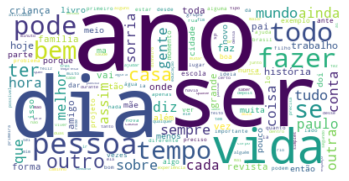

In [ ]:
wordcloud(df)

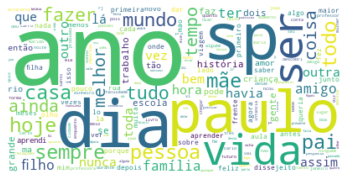

In [ ]:
wordcloud(amar)

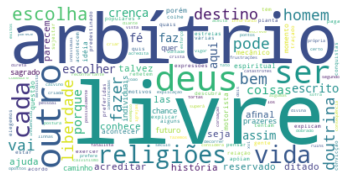

In [ ]:
wordcloud(aprender)

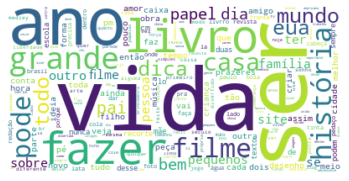

In [ ]:
wordcloud(brincar)

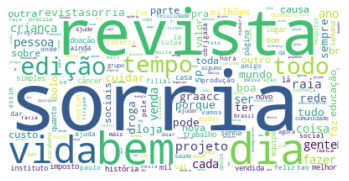

In [ ]:
wordcloud(roberta)

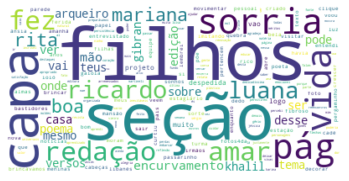

In [ ]:
wordcloud(editor)

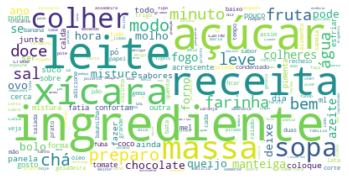

In [ ]:
wordcloud(comer)

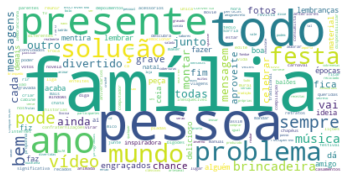

In [ ]:
wordcloud(como_faço)

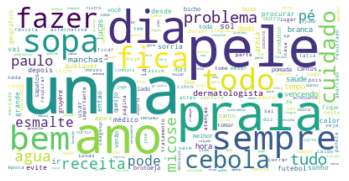

In [ ]:
wordcloud(como_vai)

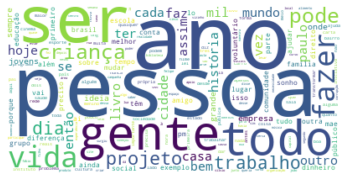

In [ ]:
wordcloud(conhecer)

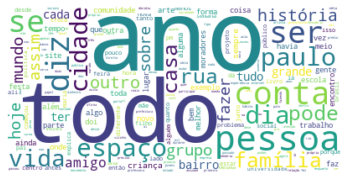

In [ ]:
wordcloud(conviver)

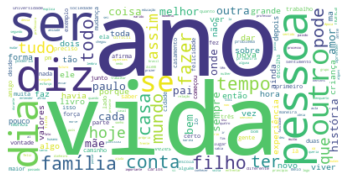

In [ ]:
wordcloud(crescer)

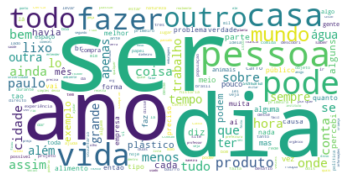

In [ ]:
wordcloud(cuidar)

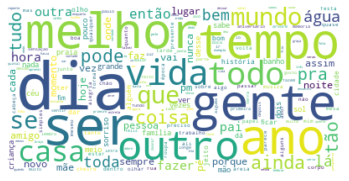

In [ ]:
wordcloud(descobrir)

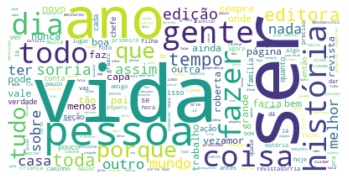

In [ ]:
wordcloud(editorial)

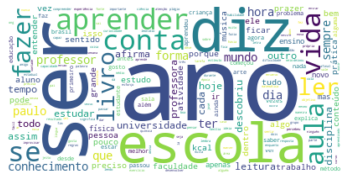

In [ ]:
wordcloud(educar)

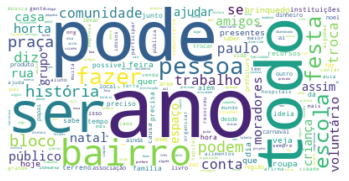

In [ ]:
wordcloud(envolver)

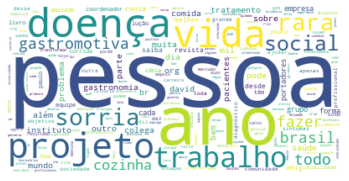

In [ ]:
wordcloud(gente_faz)

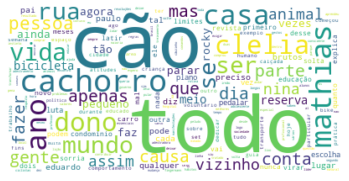

In [ ]:
wordcloud(lugar_comum)

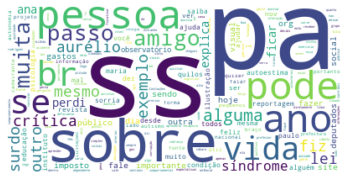

In [ ]:
wordcloud(manual)

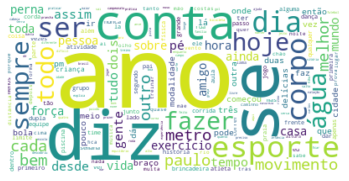

In [ ]:
wordcloud(movimentar)

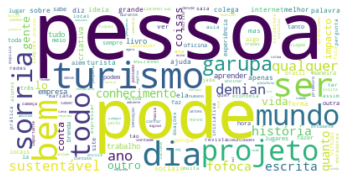

In [ ]:
wordcloud(nota)

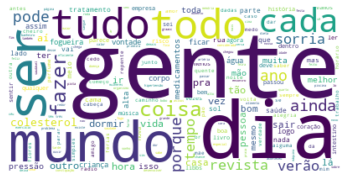

In [ ]:
wordcloud(prazeres)

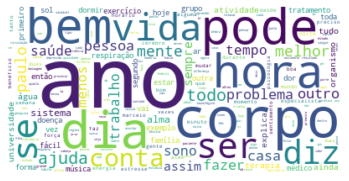

In [ ]:
wordcloud(proteger)

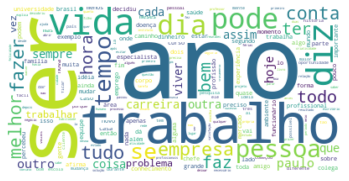

In [ ]:
wordcloud(trabalhar)

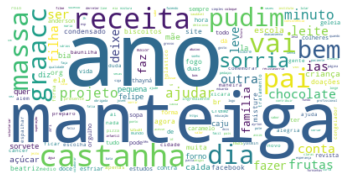

In [ ]:
wordcloud(mesa)